### $\large{\color {red} {\text{Notes for the reader of this JupyterLab notebook}}}$  
This notebook in intended to be rendered into a PDF document by Quarto. The notebook contains formating tags, Quarto markdown code and sections within HTML comment tags that are excluded from the PDF document. Quarto does a good job of rendering the Jupyter Notebook into a final document. The output is not exactly publication ready, but good enough to share online. The organizaion of this report will loosly follow parts of the IMRaD and IEEE style guidlines.

Some of the narration in this report was generated by Google's NotebookLM and Gemini, then modified by me. Since this paper is not being submitted as homework or for publication in a journal, I feel the use of AI is acceptable for my personal writing projects.

The "out of the box" abilities of Quarto to generate publication ready reports is somewhat limited. I have not made anyy attempt to add any YAML or LaTex code to this notebook so that journal formating is produced. There are some online posts which offer guidlines on how to do this, but for this effort, only the basic features of Quarto are being used. For example, section headings, column widths, fonts, equation numbering etc. use the basic Quarto PDF format. Reference numbering is not working with the basic setup.

### $\large{\color {red} {\text{Notes for the auther}}}$  

Update author names and email

[Analysis of the Buchla 295 10 Channel Comb Filter -- a Weird Twin-T Topology (free paper)](https://www.youtube.com/watch?v=6DCNOUWSGxc)

[A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer](https://arxiv.org/abs/2411.11358).

https://github.com/lantertronics/buchla-plots

https://buchla.com/history/

https://en.wikipedia.org/wiki/Buchla_Electronic_Musical_Instruments

https://www.ieee.org/

#### ToDo

- clean up narrative
- check and update fig captions
- check and fix references
- archive draft version and remove old parts
- spell and grammer chaeck

#### Versions

- 3-Mar-2025: Last save before trimming old code. This version is saved as Twin-T_Active_Bandpass_Filter_3-Mar-star.ipynb.tar.gz and can be accessed to get old code, test code and draft comments.


***Abstract***: This report is an analysis of a band pass filter using Symbolic Modified Nodal Analysis implemented with Python in a JupyterLab Notebook then rendered into a PDF. The report builds on the work, *A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer*, by Aaron D. Lanterman. The report continues with related analysis, thoughts and observations about the filter topology. The use of SymPy makes generating the node equations and obtainig analalytic solutions for the node voltages almost efferortless.

![Schematic for Bandpass Twin-T Active Filter with componets for the 1000 Hz band pass filter.](Bandpass_Twin-T_Active_Filter.png){width=600}

# INTRODUCTION
This report walks through some of the analysis found in [1], which, describes a third order bandpass filter (BPF) employed in the Buchla Model 295 10 Channel Comb Filter, a synthesizer module developed as part of the Buchla 200 Electric Music Box. The BPF described has a unique arrangement of elements not found in the typical Twin-T configuration, which makes this BPF a interesting candiditate to study. I sometimes watch YouTube videos made by [Lantertronics - Aaron Lanterman](https://www.youtube.com/@Lantertronics), the author of [1]. His video, [Analysis of the Buchla 295 10 Channel Comb Filter - a Weird Twin-T Topology](https://www.youtube.com/watch?v=6DCNOUWSGxc&t=3s), describes this filter and some of its characteristics. 

A proceddure implemented in the [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) programming language called [modified nodal analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis) (MNA) [2] is used to generate the network equations used in this analysis. The MNA procedure provides an algorithmic method for generating a system of independent equations for linear circuit analysis. Once the scematic is drawn and the net list is generated, the network equations and solutions for the node voltages are eaily obtained as shown in this report. The code in the Jupyter notebook can be used as a template to analyize almost any linear circuit. The schematic for the filter, Figure 1, was drawn using [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) and the netlist was exported for the analysis.

This report was written using a [JupyterLab](https://jupyter.org/) notebook and rendered to a PDF document using [Quarto](https://quarto.org/) which is an open-source scientific and technical publishing system. The source code for this paper is available [here](https://github.com/Tiburonboy/EE_jupyter_notebooks/tree/main/Buchla%20Twin-T%20Active%20Filter) and related material is located [here](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis).

My motivation for writing this report is: a) my own educational purposes, b) to explore the ability of Python to solve circuit analysis problems, and c) to document the procedure for rendering a JupyterLab notebook into a PDF document.

## Buchla History
Buchla Electronic Musical Instruments (BEMI) was founded by Don Buchla in 1963 under the name Buchla & Associates. The company manufactured synthesizers and MIDI controllers. Buchla's modular synthesizers, like the Buchla 100 and 200 series, were innovative in their design and sound creation approach, differing from Moog synthesizers by employing complex oscillators and waveshaping. 

## Related Work
The Python code presented in this report is somewhat unique since Python is open source, free and runs on a variety of platforms. The Python MNA code, [x], is made available under a public domain license and archived in a github [repository](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis).

There are other symbolic circuit analysis codes available and some of these are described here. Some of these codes are based on commercial software such as MATLAB, [TINA](https://www.tina.com/) and [Maple](https://www.maplesoft.com/).

[SLiCAP](https://analog-electronics.tudelft.nl/SLiCAP.html) is a symbolic linear analysis tool. SLiCAP is now a Python program, but originally it was written in MATLAB.

TINA is an acronym of Toolkit for Interactive Network Analysis. The TINA design suite is a circuit simulator and PCB design software package for analyzing, designing, and real time testing of analog, digital, HDL, MCU, and mixed electronic circuits and their PCB layouts. TINA has some [symbolic analysis capability](https://www.tina.com/symbolic-analysis).

Maple is a mathematical package and there is an application [note](https://www.maplesoft.com/applications/view.aspx?SID=1427) available describing its use in symbolic circuit analysis. The application note presents a method for evaluating, solving and designing a common, but not so simple pulse-mode high-gain transimpedance amplifier or TIA circuit.

[Symbolic Circuit Analysis](https://rodanski.net/ben/work/symbolic/index.htm) is a web page devoted to symbolic circuit analysis.

[SAPWIN](http://www.ewh.ieee.org/soc/es/May2001/12/Begin.htm) is a windows program package for symbolic and numerical simulation of analog circuits.

[Lcapy](https://github.com/mph-/lcapy) is an experimental Python package for teaching linear circuit analysis. It uses SymPy for symbolic mathematics. In [3] there is an overview of Lcapy as well as a survey of symbolic circuit analysis packages.

## Circuit Description
The schematic for the 1000 Hz section of the comb filter is shown in Figure 1. The schematic was drawn using LTSpice and the netlist was exported for this analysis. The schematic has component values for the 1000 Hz section of the comb filter. The input node is labeled node 1 and the output of the Op Amp is labeled node 2. The other nodes are sequencially labeled from 3 to 5. The filter circuit has three resisters, three capacitors and one Op Amp. The component values shown in the schematic, Figure 1, where chosen from [1, Table I], which is the 1000 Hz filter. In [4], the Op Amp is listed as N5556V, which is an operational amplifier manufactured by Signetics. The Op Amp used in the analysis is an ideal Op Amp, which is defined in the Python MNA code as a circuit element of type ```O``` in the circuit netlist.  

The Twin-T filter topology is made up of two "T" shaped networks connected together, which is why it's called "Twin-T". The arrangment of the resistors and capacitors in Figure 1 is a bit different than the more common notch (band stop) Twin-T filter which shows up in on-line when you search for "Twin-T".  

The filter has three capacitors which sugests that the circuit has a thrird order characteristic polynominal. 

## Analysis
The circuit analysis is performed using a JupyterLab notebook running Python code. This report is directly rendered from a JupyterLab notebook and the code cells with results are displayed. The code cells are highlighted in gray and most of the code output are displayed by converting the equations to LaTex and then markdown to make the fonts used by the PDF rendering engine consistent. Some of the code cells have supressed in the PDF output by placing mark down command, ```#| echo: false```, in the first line of the code cell. This was done to improve readability since some of the code repeats. The ```ipynb``` notebook file in the GitHub repository can be examined to view all the code cells, even those hidden by using HTML comment tags.

LTSpice was used to draw the schematic of the filter and generate the netlist. The component values were manually edited to used scientif notation and the Op Amp entry was fixed. The analysis begins with generating the newtork equations from the circuits netlist by calling:

```report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)```

SymPy is capabled of working through the algebra to solved the system of equations and even find the roots of the numerator and denominator polimominals.

The analysis continues with a reduced complexity version of the filter, as described in [1]. A sensitivity analysis for the filter is performed along with a Monte Carlo and worst case tolerance analysis.

New sections

- Combinations of substitutions
- Investigate range of allowable initial guesses
- design plots

New section. Results, Discussion and Conclusion

### Reproducibility
The analysis is based on Python modules constsing of SymPy, NumPy, SciPy and Pandas. Code to automatically generate network equations from circuit netlist using Modified-Nodal-Analysis [2]. The function [SymMNA](https://tiburonboy.github.io/Symbolic-Modified-Nodal-Analysis-using-Python/SMNA-function.html) is describe in the hyperlink. The results presented in this report should be reproducable if the package versions listed in Table 1 are used.

| Package | version |
|:---|:---|
| [Python](https://www.python.org/) | 3.10.9 |
| [JupyterLab](https://jupyterlab.readthedocs.io/en/latest/) |3.5.3 |
| [IPython](https://ipython.org/) | 8.10.0 |
| [NumPy](https://numpy.org/) | 1.23.5 |
| [SymPy](https://www.sympy.org/) | 1.11.1 |
| [SciPy](https://scipy.org/) | 1.10.0 |
| [Pandas](https://pandas.pydata.org/) | 1.5.3 |
| [Matplotlib](https://matplotlib.org/) | 3.7.0 |
| [Tabulate](https://pypi.org/project/tabulate/) | 0.8.10  |
| [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) | 17.1.8 |
| [Quarto](https://quarto.org/) | 1.4.553 |
: Package or Library versions {tbl-colwidths="[20,20]"}

The JupyterLab notebook used to generate this report was run on a laptop with an Intel i3-8130U CPU @ 2.2 GHz, illustrating that a high performace machine is not required to perform the analysis described in this document.

In [1]:
#| echo: false
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

# SYMBOLIC ANALYSIS
Symbolic analysis presented in this report employes the MNA technique to generate network equations from the filter's netlist with the circuit's elements are represented by symbols. SymPy is used to solve the system of equations in symbolic form to obtain analytic expressions for the filter's voltage transfer function. The symbolic expressions can in some cases provide a deeper understanding of how each component contributes to the circuit's operation that can complement numerical simulations.

## Circuit Netlist
The netlist generated by LTSpice from the schematic is shown below. Some edits were made to fix up the formating of the component values and the Op Amp declaration. The nodes were labeled in the schematic, otherwise LTSpice will use default labels such as N001, N002 etc. and the smna function wants integer values for the node numbers and these need to be consecutively ordered with no gaps in the numbering.

```
    * Bandpass-Twin-T-Active-Filter.asc
    R1 3 1 15k
    R2 4 5 186k
    R3 2 5 15k
    C1 5 1 10n
    C2 4 3 910p
    C3 2 3 10n
    XU1 4 0 2 opamp Aol=100K GBW=10Meg
    V1 1 0 1 AC 1
    .lib opamp.sub
    .ac dec 1000 100 10k
    .backanno
    .end
```

Generation of the netlist from a schematic caputure program is comvinent and less error propne than generating the netwlist by hand. A visiual inspection of the schematic insurs that the circuit to be analyzed is correct and it follows that the netlist is alos correct. This is espically true or larger more complicated schamitics. 

The cleaned up netlist was copied to the cell below. The tripple quotes allow text strings to span multiple lines since the line breaks are preserved.

In [2]:
#| echo: true
example_net_list = '''
* Bandpass-Twin-T-Active-Filter.asc
R1 3 1 15e3
R2 4 5 186e3
R3 2 5 15e3
C1 5 1 10e-9
C2 4 3 910e-12
C3 2 3 10e-9
O1 4 0 2
V1 1 0 1
'''

## Generate Network Equations 
The function ```SymMNA.smna(example_net_list)``` implements the MNA method on the filter's netlist. Stamps which are templates for modifying the B, C and D matrices are used to facilitate the construction of the matrices. The stamps used in this implementation of the MNA follow the stamps of [4]. The function is divided in the following sections.  

- The preprocessor reads in the netlist text file and removes comments, extra spaces and blank lines. The first letter of the element type is capitalized to make subsequent parsing of the file easier. The number of lines are counted and the number of entries on each line are checked to make sure the count is consistent with the element type.
- The parser code loads the preprocessed netlist into a data frame.  A report is generated which consists of a count of the element types in the netlist.
- Matrix formulation: Each of the matrices and vectors are generated.
- Circuit equation generation: The circuit equations are generated in a ```for``` loop. Sympy automatically does some simplification according to its default settings. The Laplace variable $s$ is used when inductors and capacitors are included in the circuit.

There is a limited amount of error checking performed. The number of items on each line in the netlist is checked to make sure the count is correct depending on the element type. The node numbering needs to be consecutive with no skipped numbers, otherwise empty rows or columns will be included in the matrix. Unknown element types create an error.

The function takes one argument which is a text string that is the circuit’s netlist. The format of the netlist is very similar to the standard spice netlist and any of the required changes can be easily made with a text editor. The function returns six items.  

1. report - a text string, which is the netlist report.
2. df - a Pandas data frame, which the circuit’s net list info loaded into a data frame.
3. df2 - a Pandas data frame, which contains the branches with unknown currents.
4. $A$ - a SymPy matrix, which is $(m+n)$ by $(m+n)$, where $n$ is the number of nodes and $m$ is the number of current unknowns. $A$ is the combination of four smaller matrices, $G$, $B$, $C$, and $D$. These matrices are described in the GitHub repository.
5. $X$ - a list that holds the unknown node voltages and the currents through the independent voltage sources.
6. $Z$ - a list that holds the independent voltage and current sources

The netlist can be generated by hand or exported from a schematic capture program and pasted into the JupyterLab notebook.

In [3]:
#| echo: true
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

Convert the lists of unknown node voltages and currents as well as the list of independednt voltage and current sources into SymPy matrices. 

In [4]:
#| echo: true
X = Matrix(X)
Z = Matrix(Z)

Use the SymPy function ```Eq``` to formulate the network equations.

In [5]:
#| echo: true
NE_sym = Eq(A*X,Z)

The equations, ```NE_sym```, define the mathematical relationship between voltages and currents in the filter circuit in terms of node voltages, $v_1$, $v_2$ etc., components $R_1$, $C_1$ etc., the Laplace variable $s$ and the indepenedent voltage source $V_1$. The equations are shown below:

In [6]:
#| echo: true

# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.lhs[i]),
        latex(NE_sym.rhs[i]))

Markdown(temp)

<p>$- C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}} = 0$</p><p>$- C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$</p><p>$- C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}} = 0$</p><p>$- C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}} = 0$</p><p>$- C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}} = 0$</p><p>$v_{1} = V_{1}$</p><p>$v_{4} = 0$</p>

The two lines of Python code below turn the free symbols from the ```NE_sym``` equations into SymPy variables and the element values contained in the netlist are put into a Python dictionary data structure to be used in the numerical solutions later in this report.

In [7]:
#| echo: true
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

## Solve the Network Equations
The SymPy function ```solve``` is used to obtain the node voltages and independent voltage source currents.

In [8]:
#| echo: true
U_sym = solve(NE_sym,X)

The solution to the network equations are the node voltages expressed in terms of the Laplace variable $s$ are displayed below.

In [9]:
#| echo: true
temp = ''
for i in U_sym.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} R_{3} V_{1} s - C_{2} R_{2} V_{1} s - C_{2} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{3} = \frac{- C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} - C_{2} R_{2} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p>

### Voltage Transfer Function $H(s)=\frac {v_2(s)}{v_1(s)}$
The voltage transfer function, $H(s)$, for the filter  is generated and displayed by the following code:

In [10]:
#| echo: true
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1}$

This expression agrees with [1 eq. (1)]. The numerator is a second order polynominal and the demominator is third order polynominal in terms of $s$. Generally, the order of the dominator is equal to the number of reactive elements in the circuit. The roots of the numerator polynominal are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [11]:
#| echo: true
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator Polynominal
The numerator polynominal is:

In [12]:
#| echo: true
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)$

The coeficients of each Laplace terms can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [13]:
#| echo: true
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$\
    </p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}$</p><p>$b_1=- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}$    </p><p>$b_0=0$</p>

Notice that ther terms $b_2$ and $b_1$ are negative. This follows from the Op Amp being configured as an inverting amplifier. R2 and R3 provide a DC path from the Op Amp's output to the inverting terminal.

The roots of the numerator polynominal can easily be found with SymPy. 

This filter has two transmission zeros

In [14]:
#| echo: true
num_root_sym = solve(H_sym_num,s)

There are two solutions, $z_1=0$ and another root at: 

In [15]:
#| echo: true
Markdown('$z_2={:s}$'.format(latex(num_root_sym[1])))

$z_2=\frac{- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}}{C_{1} R_{3} \left(C_{2} R_{1} + C_{2} R_{2} + C_{3} R_{1}\right)}$

### Denominator Polynominal
The demoninator polynominal of the transfer function is called the characteristic polynominal. The roots of the denominator, also called poles of the system,  determine the system's stability. If any of these roots have a positive real part, the system is unstable, meaning its output will grow unbounded. The roots also influence how the system responds to changes in input (the transient response). They affect things like how quickly the system settles to a new state, whether it oscillates, and the damping of those oscillations. Each root of the characteristic polynominal corresponds to a natural mode of the system.

The denominator polynominal is:

In [16]:
#| echo: true
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1$

The coeficients of each Laplace terms can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_3s^3+a_2s^2+a_1s+a_0$

where $a_3$, $a_2$, $a_1$ and $a_0$ are:

In [17]:
#| echo: false
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

The roots of the denominator polynominal can found with SymPy. The filter circuit being analyzed in this report has a denominator polynominal that SymPy can quickly solve. This is not always the case. The expressions are long and do not render well when the JupyterLab notebook is converted to PDF, so the expressions were converted to LaTex strings and then to PNG images with [latex2png](https://latex2png.com/) for this report.

In [18]:
#| echo: true
denom_root_sym = solve(H_sym_denom,s)

The following code produces the LaTex strings for the equations for the roots. This section of the nowtebook is contained with HTML comment tags and is not included in the rendered PDF.
## Pole 0

Notes for generating images with GIMP

- edit LaTex strings to remove ```\\``` and replace with ```\```
- copy LaTex strings of each term to latex2png
- past png to GIMP
  - expand canvas image\canvas size change to wider and taller, eg 18 inches width by 6 inches highth
- add new layer, with new name
- past new equation, find center of image to move it to position Cntr H to anchor image
- add new layer, with new name
- past new equation, find center of image to move it to position Cntr H to anchor image
- crop image and save as png

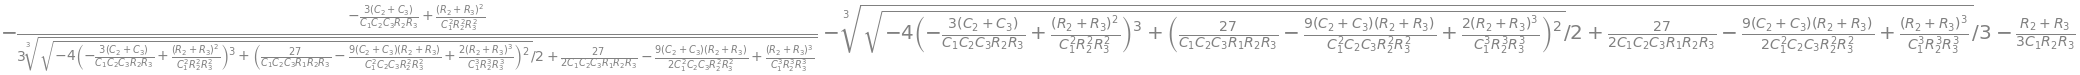

In [19]:
denom_root_sym[0]

Needed to replace ```\\``` with ```\``` , copy text string to latex2png to convert to image.

In [20]:
latex(denom_root_sym[0])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_

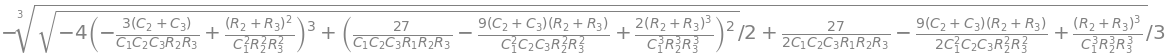

In [21]:
denom_root_sym[0].args[0]

In [22]:
latex(denom_root_sym[0].args[0])

'- \\frac{\\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

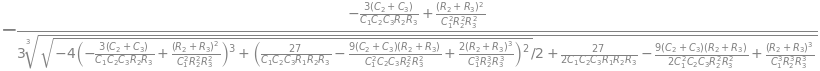

In [23]:
denom_root_sym[0].args[1]

In [24]:
latex(denom_root_sym[0].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

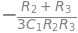

In [25]:
denom_root_sym[0].args[2]

In [26]:
latex(denom_root_sym[0].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

## Pole 1

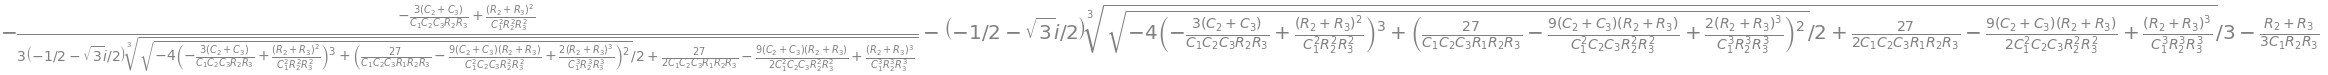

In [27]:
denom_root_sym[1]

In [28]:
latex(denom_root_sym[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt

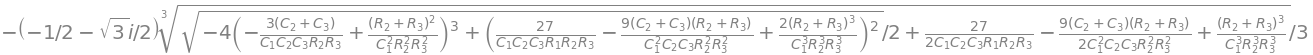

In [29]:
denom_root_sym[1].args[0]

In [30]:
latex(denom_root_sym[1].args[0])

'- \\frac{\\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

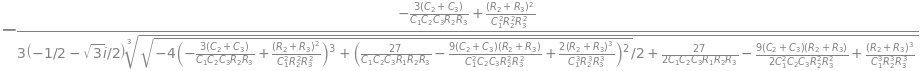

In [31]:
denom_root_sym[1].args[1]

In [32]:
latex(denom_root_sym[1].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} - \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

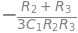

In [33]:
denom_root_sym[1].args[2]

In [34]:
latex(denom_root_sym[1].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

## Pole 2

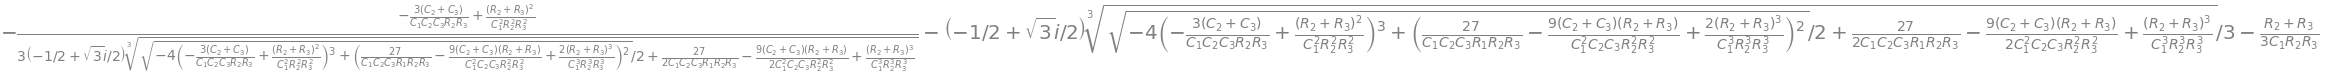

In [35]:
denom_root_sym[2]

In [36]:
latex(denom_root_sym[2])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}} - \\frac{\\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt

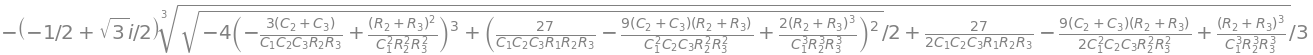

In [37]:
denom_root_sym[2].args[0]

In [38]:
latex(denom_root_sym[2].args[0])

'- \\frac{\\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}{3}'

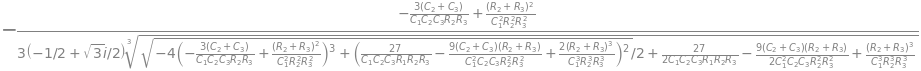

In [39]:
denom_root_sym[2].args[1]

In [40]:
latex(denom_root_sym[2].args[1])

'- \\frac{- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}}{3 \\left(- \\frac{1}{2} + \\frac{\\sqrt{3} i}{2}\\right) \\sqrt[3]{\\frac{\\sqrt{- 4 \\left(- \\frac{3 \\left(C_{2} + C_{3}\\right)}{C_{1} C_{2} C_{3} R_{2} R_{3}} + \\frac{\\left(R_{2} + R_{3}\\right)^{2}}{C_{1}^{2} R_{2}^{2} R_{3}^{2}}\\right)^{3} + \\left(\\frac{27}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{2 \\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}\\right)^{2}}}{2} + \\frac{27}{2 C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}} - \\frac{9 \\left(C_{2} + C_{3}\\right) \\left(R_{2} + R_{3}\\right)}{2 C_{1}^{2} C_{2} C_{3} R_{2}^{2} R_{3}^{2}} + \\frac{\\left(R_{2} + R_{3}\\right)^{3}}{C_{1}^{3} R_{2}^{3} R_{3}^{3}}}}'

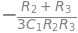

In [41]:
denom_root_sym[2].args[2]

In [42]:
latex(denom_root_sym[1].args[2])

'- \\frac{R_{2} + R_{3}}{3 C_{1} R_{2} R_{3}}'

Alternatively, using: $a_3s^3+a_2s^2+a_1s+a_0$

In [43]:
a2, a1, a0 = symbols('a2 a1 a0')

s**3+a2*s**2+a1*s+a0

In [44]:
roots = solve(s**3+a2*s**2+a1*s+a0,s)

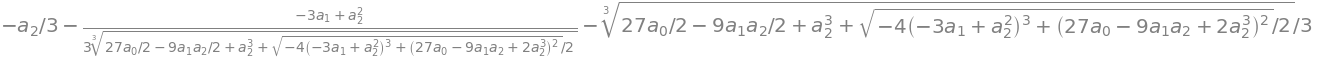

In [45]:
roots[0]

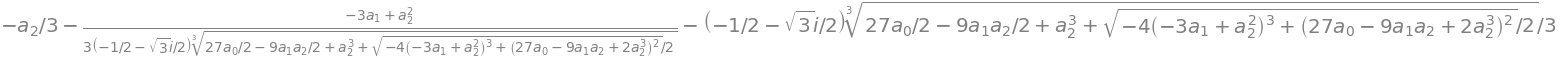

In [46]:
roots[1]

In [47]:
#| echo: false
Markdown('$p_1={:s}$'.format(latex(roots[1])))

$p_1=- \frac{a_{2}}{3} - \frac{- 3 a_{1} + a_{2}^{2}}{3 \left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27 a_{0}}{2} - \frac{9 a_{1} a_{2}}{2} + a_{2}^{3} + \frac{\sqrt{- 4 \left(- 3 a_{1} + a_{2}^{2}\right)^{3} + \left(27 a_{0} - 9 a_{1} a_{2} + 2 a_{2}^{3}\right)^{2}}}{2}}} - \frac{\left(- \frac{1}{2} - \frac{\sqrt{3} i}{2}\right) \sqrt[3]{\frac{27 a_{0}}{2} - \frac{9 a_{1} a_{2}}{2} + a_{2}^{3} + \frac{\sqrt{- 4 \left(- 3 a_{1} + a_{2}^{2}\right)^{3} + \left(27 a_{0} - 9 a_{1} a_{2} + 2 a_{2}^{3}\right)^{2}}}{2}}}{3}$

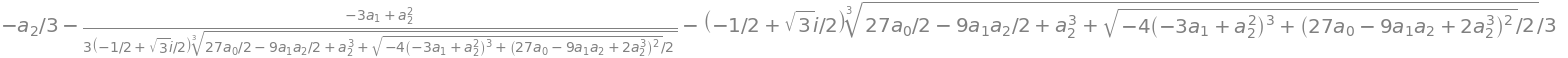

In [48]:
roots[2]

![Terms for the first pole.](pole0.png)

![Terms for the second pole.](pole1.png)

![Terms for the third pole.](pole2.png)

As is evident in the analytic expressions for the poles of the transfer fruction shown in the figures above, these expressions are not very intuitive or useful inless some simplication is performed. With the help of the Python code and SymPy, the procedure outlined above can be considerd a 'brute force' analysis, where analyltic expressions can be easily obtained from a circuit's netlist with little effort. If the circuit is small, that is having only a few componets or nodes, the symbolic expressions can be very useful.  

trying to coller terms and do some algebra

In [49]:
H_sym_num

In [50]:
(-C1*C2*R1*R3 - C1*C2*R2*R3 - C1*C3*R1*R3)

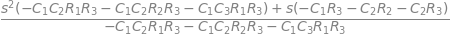

In [51]:
H_sym_num/(-C1*C2*R1*R3 - C1*C2*R2*R3 - C1*C3*R1*R3)

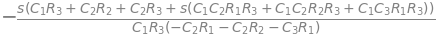

In [52]:
(H_sym_num/(-C1*C2*R1*R3 - C1*C2*R2*R3 - C1*C3*R1*R3)).expand().collect(s).factor(s)

In [53]:
H_sym_denom

In [54]:
C1*C2*C3*R1*R2*R3

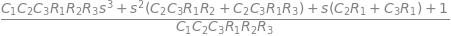

In [55]:
(H_sym_denom/(C1*C2*C3*R1*R2*R3)).expand().collect(s).factor(s)

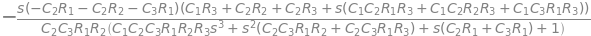

In [56]:
temp1 = ((H_sym_num/(C1*C2*C3*R1*R2*R3)).expand().collect(s).factor(s))/((H_sym_denom/(-C1*C2*R1*R3 - C1*C2*R2*R3 - C1*C3*R1*R3)).expand().collect(s).factor(s))
temp1

In [57]:
num1, denom1 = fraction(temp1)

In [58]:
str(num1)

'-s*(-C2*R1 - C2*R2 - C3*R1)*(C1*R3 + C2*R2 + C2*R3 + s*(C1*C2*R1*R3 + C1*C2*R2*R3 + C1*C3*R1*R3))'

In [59]:
-C2*R1 - C2*R2 - C3*R1

In [60]:
str(denom1)

'C2*C3*R1*R2*(C1*C2*C3*R1*R2*R3*s**3 + s**2*(C2*C3*R1*R2 + C2*C3*R1*R3) + s*(C2*R1 + C3*R1) + 1)'

In [61]:
C2*C3*R1*R2

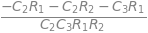

In [62]:
A1=(-C2*R1 - C2*R2 - C3*R1)/(C2*C3*R1*R2)
A1

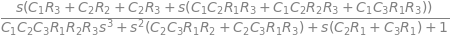

In [63]:
H1=(s*(C1*R3 + C2*R2 + C2*R3 + s*(C1*C2*R1*R3 + C1*C2*R2*R3 + C1*C3*R1*R3)))/(C1*C2*C3*R1*R2*R3*s**3 + s**2*(C2*C3*R1*R2 + C2*C3*R1*R3) + s*(C2*R1 + C3*R1) + 1)
H1

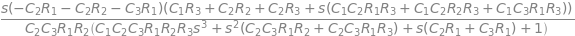

In [64]:
A1*H1

In [65]:
H_sym == A1*H1

False

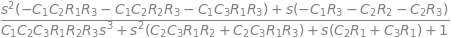

In [66]:
H_sym

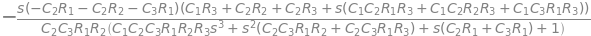

In [67]:
temp1

## FACTS (Fast Analytical Circuits Techniques)

The FACTS (Fast Analytical Circuits Techniques) method refers to a circuit analysis technique that enables engineers to obtain the transfer functions and input and output impedances of a circuit by inspection without resorting to too much algebra. The circuits offered as illustrations of the technique are small with one or two reactive elements. Middlebrook [x] seems to have been the first proponent of the method and describes what he calls design oriented analysis. He talks about low entropy equations, in which the terms and elements are ordered or grouped in such a way that their physical origin, where they come from in the circuit, and what part of the circuit contributes to this part of the final expression becomes obvious. The method is also described in [x].

The origin of the FACTS circuit analysis method, as stated above, is from [x] and [x] @Middlebrook1991. [IEEE](https://www.ieee.org/) technical papers and books by [x] @basso2016 and [x] @Vorpérian2002 have been written on the subject, however these are not free or available to download for free. FACTS is a circuit analysis method where the transfer function is determined by applying the Extra Element Theorem. Christophe Basso, Vatché Vorpérian and others have open source content available:

- [Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling](https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf)
- A series of 22 YouTube videos starting with: [Fast Analytical Techniques for Electrical and Electronic Circuits](https://www.youtube.com/watch?v=uir9Js1l_r8)
- [Extra Element Theorem: An Introduction (with Examples)](https://www.edn.com/middlebrooks-extra-element-theorem/)

According to the open source FACTS literature:

>The well-known and widely used methods of nodal or loop analysis, while effective for obtaining numerical solutions, are largely ineffective for deriving analytical solutions in symbolic form, except for simple circuits. Attempting to invert a matrix with symbolic entries, even for low-order matrices, results in tedious algebra and complex, high-entropy expressions that provide little meaningful insight.

The FACTS procedure, as illustrated in the open source literature, employs example circuits that are usually of order 1 or 2. The procedure results in equations that keep circuit elements grouped together and thus the equations are more intuitive. For 3rd order and higher circuits, the procedure becomes rather involved and I didn't see any circuit analysis examples beyond a 2nd order circuit.

Traditional circuit analysis techniques usually don't produce analytical answers, i.e. equations in terms of symbols. Both the FACTS procedure and the MNA Python code in this book yield analytical answers, with the FACTS results possibly being more intuitive and the MNA Python code providing an automated solution, which would then have to be algebraically manipulated to be put into a FACTS type solution.


IN the video series start with video 8

Add link to jupyterlab notebook in github.

https://github.com/Tiburonboy/EE_jupyter_notebooks/blob/main/Buchla%20Twin-T%20Active%20Filter/Twin-T_BPF_FACTS.ipynb


Prototype FACTS equations in seperate notebook. 

Twin-T_BPF_FACTS.ipynb

references
```
@INPROCEEDINGS{Middlebrook1992,
  author={Middlebrook, R.D.},
  booktitle={Proceedings. Twenty-Second Annual conference Frontiers in Education}, 
  title={Methods of Design-Oriented Analysis: The Quadratic Equation Revisited}, 
  year={1992},
  pages={95-102},
  doi={10.1109/FIE.1992.683365}
}

@INPROCEEDINGS{Middlebrook1991,
  author={Middlebrook, R.D.},
  booktitle={Proceedings Frontiers in Education Twenty-First Annual Conference. Engineering Education in a New World Order}, 
  title={Low-entropy expressions: the key to design-oriented analysis}, 
  year={1991},
  pages={399-403},
  doi={10.1109/FIE.1991.187513}
}

@online{basso2016,
    author = {Basso, Christophe},
    title = {Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling},
    url  = {https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf},
    year={2016},
    addendum = {accessed 12 Feb 2024}
}

@book{Vorpérian2002,
  title={Fast Analytical Techniques for Electrical and Electronic Circuits},
  author={Vatché Vorpérian},
  isbn={9780521624718},
  year={2002},
  url={https://www.cambridge.org/core/books/fast-analytical-techniques-for-electrical-and-electronic-circuits/17845BA88A05A1645A8409D6739A475A#fndtn-information},
  publisher={Cambridge University Press},
  addendum = {accessed 1 July 2024}
}
```

# REDUCED COMPLEXITY
As described in [1], the transfer function for the filter simplifies under the case of $R_1=R_3$ and $C_1=C_3$ to a second order polynominal characteristic equation. This simplification works because a zero cancels with a pole in the voltage transfer function. The numerator polynominal reduces to the following when the Laplace term, $s$, is colleded and factored. 

## Other reduced complexity options
In Handbook OP Amp Circuit Design, 3rd oder LPF, two simpliiciation options

Let R1=R2=R3=R and solve for R and capacitor values (I think this results in a 3rd order poly for the BPF)

Let C1=C2=C3=C and solve for C and resistor values

How was Figure 10.6 generated?  Use Python to generate poles for various filter types.

Design procedure

- Choose C1", C2" and C3" from table (Bessel, Butterworth an various Chebyshev)
- frequncy scale Cn" to get Cn'
- Cn = Cn'/R

So the question is how was Table 10.3 generated?

In Filter Design Handbook, page 5.60, the C's are scaled from C, C1=C, C3=C1/2, C2 >= C1 (b-1)/4, where b=(finf/fo)^2

See page 3.26 for formula for b (LPF)


### Other thoughts

Thinking about poles and zeros, zero at DC and one to the left of all the poles to preserve the BPF freq response shape.  

In [68]:
#| echo: false
C, R = symbols('C R')
Markdown('$N_r(s)={:s}$'.format(latex(H_sym_num.subs({R1:R,R3:R,C1:C,C3:C}).collect(s).factor())))

$N_r(s)=- s \left(C R s + 1\right) \left(C R + C_{2} R + C_{2} R_{2}\right)$

In a simular fashon, the denominator polynominal is:

In [69]:
#| echo: false
Markdown('$D_r(s)={:s}$'.format(latex(H_sym_denom.subs({R1:R,R3:R,C1:C,C3:C}).collect(s).factor())))

$D_r(s)=\left(C R s + 1\right) \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)$

You can see the $\left(CRs+1\right)$ terms will cancel in the numerator and denominator.

$\frac {N_r(s)}{D_r(s)}=\frac {- s \left(C R s + 1\right) \left(C R + C_{2} R + C_{2} R_{2}\right)}{\left(C R s + 1\right) \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)}=\frac {- s \left(C R + C_{2} R + C_{2} R_{2}\right)}{ \left(C C_{2} R R_{2} s^{2} + C_{2} R s + 1\right)}$

## Symbolic Analysis for $R1 = R3 = R$ and $C1 = C3 = C$
The following Python code makes the substitution, $R_1 = R_3 = R$ and $C_1 = C_3 = C$, into the network equations. 

In [70]:
#| echo: true
NE_sym_reduced_complexity = NE_sym.subs({R1:R,R3:R,C1:C,C3:C})

This produces the following network equations:

In [71]:
#| echo: false
# display the equations
temp = ''
for i in range(shape(NE_sym_reduced_complexity.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym_reduced_complexity.rhs[i]),latex(NE_sym_reduced_complexity.lhs[i]))
Markdown(temp)

<p>$0 = - C s v_{5} + I_{V1} + v_{1} \left(C s + \frac{1}{R}\right) - \frac{v_{3}}{R}$</p><p>$0 = - C s v_{3} + I_{O1} + v_{2} \left(C s + \frac{1}{R}\right) - \frac{v_{5}}{R}$</p><p>$0 = - C s v_{2} - C_{2} s v_{4} + v_{3} \left(C s + C_{2} s + \frac{1}{R}\right) - \frac{v_{1}}{R}$</p><p>$0 = - C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}}$</p><p>$0 = - C s v_{1} + v_{5} \left(C s + \frac{1}{R_{2}} + \frac{1}{R}\right) - \frac{v_{4}}{R_{2}} - \frac{v_{2}}{R}$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

The unknown node voltages and current from $V_1$ can be found by using the SymPy ```solve``` function. 

In [72]:
#| echo: true
U_sym_reduced_complexity = solve(NE_sym_reduced_complexity,X)

The produces the following expresions for the node voltages.

In [73]:
#| echo: false
temp = ''
for i in U_sym_reduced_complexity.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_complexity[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C R V_{1} s - C_{2} R V_{1} s - C_{2} R_{2} V_{1} s}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p><p>$v_{3} = \frac{- C R V_{1} s + V_{1}}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C C_{2} R R_{2} V_{1} s^{2} - C_{2} R_{2} V_{1} s}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$</p>

## Transfer Function $H(s)=\frac {v_2(s)}{v_1(s)}$
The voltage transfer function for the reduced complexity network is:

In [74]:
#| echo: false
H_sym_reduced_complexity = cancel(U_sym_reduced_complexity[v2]/U_sym_reduced_complexity[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym_reduced_complexity)))

$H(s)=\frac{s \left(- C R - C_{2} R - C_{2} R_{2}\right)}{C C_{2} R R_{2} s^{2} + C_{2} R s + 1}$

The equation above is different than [1, eq (8)], which is missing the $s$ term in the numerator. 

### Characteristic Polynominal
The characteristic polynominal for $R_1 = R_3 = R$ and $C_1 = C_3 = C$, is shown below.

In [75]:
#| echo: false
H_sym_reduced_complexity_num, H_sym_reduced_complexity_denom = fraction(H_sym_reduced_complexity,s) #returns numerator and denominator
Markdown('${:s}$'.format(latex(H_sym_reduced_complexity_denom)))

$C C_{2} R R_{2} s^{2} + C_{2} R s + 1$

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$

where:

In [76]:
#| echo: false
a = H_sym_reduced_complexity_denom.coeff(s**2)
b = H_sym_reduced_complexity_denom.coeff(s**1)
c = H_sym_reduced_complexity_denom - b*s*1 - a*s**2
Markdown('<p>$a={:s}$</p><p>\
    $b={:s}$</p><p>$c={:s}$</p>'.format(latex(a),latex(b),latex(c)))

<p>$a=C C_{2} R R_{2}$</p><p>    $b=C_{2} R$</p><p>$c=1$</p>

The poles of the transfer function are:

In [77]:
#| echo: false
H_sym_reduced_complexity_denom_roots = solve(H_sym_reduced_complexity_denom,s)

Markdown('${:s}$'.format(latex(H_sym_reduced_complexity_denom_roots)))

$\left[ \frac{- C_{2} R - \sqrt{C_{2} R \left(- 4 C R_{2} + C_{2} R\right)}}{2 C C_{2} R R_{2}}, \  \frac{- C_{2} R + \sqrt{C_{2} R \left(- 4 C R_{2} + C_{2} R\right)}}{2 C C_{2} R R_{2}}\right]$

The pole are complex if, $C_{2} R < 4 C R_{2}$.

### Natural Frequency, Q Factor and Damping Ratio
As described in [Q factor](https://en.wikipedia.org/w/index.php?title=Q_factor), a two pole band pass filter has the following transfer function:

$H(s) = \frac {\frac {\omega_n}{Q}s} {s^{2}+{\frac {\omega_n}{Q}s+\omega_n}^{2}}$

The demominator of $H(s)$, also called the characteristic polynominal, and is: 

$s^2+\frac{\omega_n}{Q}s+\omega_n^2$

Rearanging the coefficients of the Lapace variable, we get:

$\frac {s^2}{\omega_n^2} + \frac{1}{Q \omega_n}s+1$

By equating the coefficients, $\omega_n$, Q Factor and Damping Ratio can be expressed in terms of $R_2$, $R$, $C_2$ and $C$.

In [78]:
#| echo: false
omega_n, Q_factor, damping_ratio, atten_param = symbols('omega_n Q_factor damping_ratio atten_param')

In [79]:
#| echo: false
omega_n = solve(1/omega_n**2 - a, omega_n)[1]
Markdown('$\omega_n = {:s}$'.format(latex(omega_n)))

$\omega_n = \sqrt{\frac{1}{C C_{2} R R_{2}}}$

In [80]:
#| echo: false
Q_factor = solve(1/(Q_factor*omega_n) - b, Q_factor)[0]
Markdown('$Q\ factor = {:s}$'.format(latex(Q_factor)))

$Q\ factor = \frac{1}{C_{2} R \sqrt{\frac{1}{C C_{2} R R_{2}}}}$

In [1, eq. (12)] the following expression for Q is given:

$\sqrt {\frac {R_2C_1}{R_1C_2}}$

which is different than my results.

From [Q factor](https://en.wikipedia.org/w/index.php?title=Q_factor): 

$\frac{\omega_n}{Q} = 2 \zeta \omega_n = 2 \alpha$

Solving for the damping ratio, $\zeta$:

In [81]:
#| echo: false
damping_ratio = 1/(2*Q_factor)
Markdown('$\zeta = {:s}$'.format(latex(damping_ratio)))

$\zeta = \frac{C_{2} R \sqrt{\frac{1}{C C_{2} R R_{2}}}}{2}$

The attenuation parameter, $\alpha$, represents the rate of decay of the oscillations of the system. 

<!--
not sure why double \\ in \\alpha is needed ?
-->

In [82]:
#| echo: false
atten_param = omega_n/Q_factor/2
Markdown('$\\alpha={:s}$'.format(latex(atten_param)))

$\alpha=\frac{1}{2 C R_{2}}$

## Numerical Analysis
Afer substituting the element values from the netlist into the equations with the following code:

In [83]:
#| echo: false
def round_expr(expr, num_digits):
    '''
    from stackoverflow, used to display fewer digits
    https://stackoverflow.com/questions/48491577/printing-the-output-rounded-to-3-decimals-in-sympy
    '''
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [84]:
#| echo: true
equ_N = NE_sym.subs(element_values)

we get the following numerical equations:

In [85]:
#| echo: false
# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 1.0 \cdot 10^{-8} s v_{5} + v_{1} \cdot \left(1.0 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right) - 6.6667 \cdot 10^{-5} v_{3}$</p><p>$0 = I_{O1} - 1.0 \cdot 10^{-8} s v_{3} + v_{2} \cdot \left(1.0 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right) - 6.6667 \cdot 10^{-5} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{2} - 9.0 \cdot 10^{-10} s v_{4} - 6.6667 \cdot 10^{-5} v_{1} + v_{3} \cdot \left(1.1 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right)$</p><p>$0 = - 9.0 \cdot 10^{-10} s v_{3} + v_{4} \cdot \left(1.0 \cdot 10^{-9} s + 5.376 \cdot 10^{-6}\right) - 5.376 \cdot 10^{-6} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{1} - 6.6667 \cdot 10^{-5} v_{2} - 5.376 \cdot 10^{-6} v_{4} + v_{5} \cdot \left(1.0 \cdot 10^{-8} s + 7.2043 \cdot 10^{-5}\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = v_{4}$</p>

Solve for unknown node voltages, $I_{V1}$ and $I_{O1}$ in terms of Laplace variable s. The node voltages are:

In [86]:
#| echo: false
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{- 1.53414746543779 \cdot 10^{18} s^{2} - 1.02276497695853 \cdot 10^{22} s}{117000000000000.0 s^{3} + 8.42903225806452 \cdot 10^{17} s^{2} + 5.02764976958526 \cdot 10^{21} s + 3.07219662058372 \cdot 10^{25}}$</p><p>$v_{3} = \frac{1.53609831029186 \cdot 10^{24} - 3.45622119815668 \cdot 10^{16} s^{2}}{5850000000000.0 s^{3} + 4.21451612903226 \cdot 10^{16} s^{2} + 2.51382488479263 \cdot 10^{20} s + 1.53609831029186 \cdot 10^{24}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{5850000000000.0 s^{3} - 2.6 \cdot 10^{20} s}{5850000000000.0 s^{3} + 4.21451612903226 \cdot 10^{16} s^{2} + 2.51382488479263 \cdot 10^{20} s + 1.53609831029186 \cdot 10^{24}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$, is:

In [87]:
#| echo: false
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 1.53414746543779 \cdot 10^{18} s^{2} - 1.02276497695853 \cdot 10^{22} s}{117000000000000.0 s^{3} + 8.42903225806452 \cdot 10^{17} s^{2} + 5.02764976958526 \cdot 10^{21} s + 3.07219662058372 \cdot 10^{25}}$

The SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [88]:
#| echo: true
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

### Pole zero plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [89]:
#| echo: true
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane.

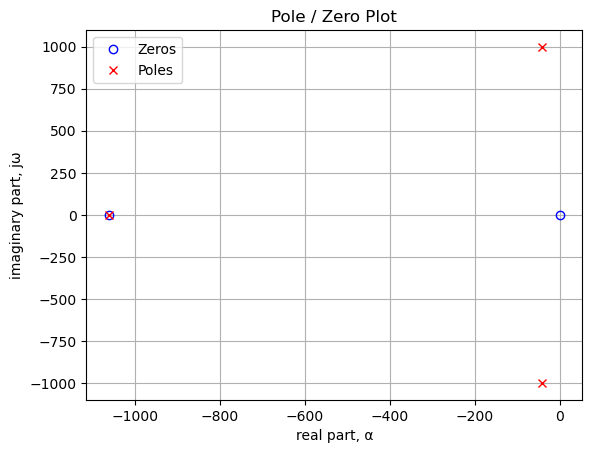

In [90]:
#| echo: true
#| fig-cap: pole zero figure caption

plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob',
    markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The table below lists the values of the pole and zero locations. 

In [91]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1061.03     -1061.03+0.00j
0.00         -42.78+997.93j
             -42.78-997.93j

In [92]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1061.03     -1061.03+0.00j
0.00         -42.78+997.93j
             -42.78-997.93j


In [93]:
#| echo: false

Markdown('The zero at {:.3f} Hz'.format(sys_zeros[0]/(2*np.pi)) + ' and the pole at {:.3f} Hz cancel.'.format(sys_poles[0]/(2*np.pi)))

The zero at -1061.033 Hz and the pole at -1061.033+0.000j Hz cancel.

### Magnitude and phase response
The plot of the filter's magnitude and phase response for the transfer function $H(s)$ is shown below.

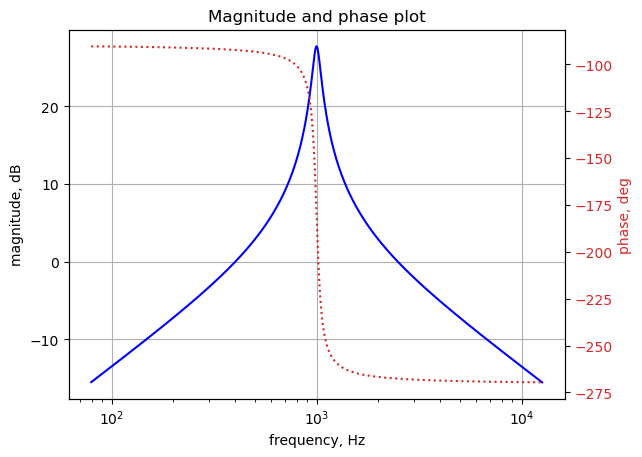

In [94]:
#| echo: true
#| fig-cap: figure caption

x = np.logspace(1.9, 4.1, 1000, endpoint=True)*2*np.pi # x axis data values
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB and
                                         # phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [95]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 27.7 dB at 997.5 Hz and the -3dB frequency is 1044.0 Hz. The attenuation to the right of the peak is 41.3 dB per decade and the filter's quality factor, Q, is 12.32.


The filter Q factor can also be calucated from the element values. 

In [96]:
Markdown('Calculated Q factor: {:.3f}'.format(N(Q_factor.subs({R:15000,R2:186000,C:1e-8,C2:9.1e-10}))))

Calculated Q factor: 11.673

The calculated Q factor is a bit different than the the Q measured from the frequency response plot. 

The envelope of oscillation decays proportional to $e^{−\alpha t}$, where $\alpha$ is the attenuation parameter calculated above.

In [97]:
#| echo: true
alpha = atten_param.subs({R:15000,R2:186000,C:1e-8,C2:9.1e-10})
Markdown('$\\alpha$ = {:.3f}'.format(alpha))

$\alpha$ = 268.817

### Step response 
The step response of the is calculated using the SciPy function [lsim](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html), which can be used to simulate output of a continuous-time linear system from the continuous-time linear time invariant system base class. The function lsim allows us to evaluate the performance characteristics of the circuit to square wave input. 

A square wave with a frequency of 25 Hz and an amplitude of one volt peak to peak is used as the input to the filter.

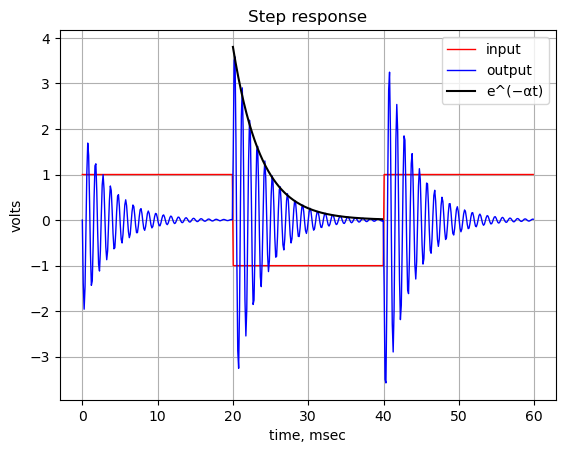

In [98]:
#| echo: false
#| fig-cap: figure caption

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')

plt.plot((t_step[0:166]+0.02)*1e3, 3.8*np.exp(-float(alpha)*t_step[0:166]),'k', linewidth = 1.5, label='e^(−αt)')

plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

The filter's response to a square wave input shows a damped oscillation that occures at each edge of the square wave. The frequency of the oscillation is about 10 cycles over 10 ms, which is 1000 Hz and corresponses to $\omega_n$ = 1kHz. The decay time constant is about 10 ms.

### Group delay
[Group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#) is a measure of the time delay experienced by a group of frequencies as they pass through a system. It's essentially the rate of change of the phase response with respect to frequency. Group Delay is important for the following reasons: 

- Signal distortion: Variations in group delay across different frequencies can cause signal distortion, affecting the quality of audio, video, and data transmission.
- System design: Understanding group delay is crucial for designing systems with linear phase characteristics, which minimize distortion.
- Pulse propagation: In fields like optics and telecommunications, group delay affects the shape and timing of pulses.

Group delay ($\tau_g$) is calculated as the negative derivative of the phase response ($\phi$) with respect to angular frequency ($\omega$):

$\tau _{g}(\omega )=-\frac  {d\phi (\omega)}{d\omega}$

A system with a constant group delay is called a linear phase system. These systems introduce a pure time delay to all frequency components without altering their relative phase relationships, preserving the original waveform shape. According to [Audibility of Group-Delay Equalization](https://acris.aalto.fi/ws/portalfiles/portal/66449704/Audibility_of_Group_Delay_Equalization.pdf), the threshold is 2 ms. The abstract for the paper states: 

> The audibility thresholds for group-delay variation from several previous related studies are shown in Fig. 1. If not otherwise stated, these studies have been conducted using headphones. Green applied Huffman sequences, or truncated impulse responses of second-order allpass filters, to study the audibility of phase distortion. He found a threshold value for the peak group delay of about 2 ms for center frequencies of 625 Hz, 1875 Hz, and 4062 Hz.

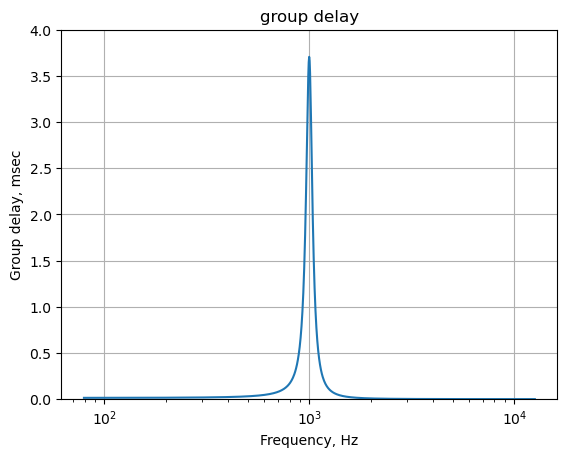

In [99]:
#| echo: true
#| fig-cap: figure caption

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,
    '-',label='group delay')

plt.ylim((0,4))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

## R2 and R3 as Variable Resistors
In the Buchla 200 Electric Music Box, the 1000 Hz BPF filter is implemented with R3 as a 20k$\Omega$ potentiometer wired as a variable resistor and R2 is actually a fix value resistor in series with a variable resistor. For the 1000Hz filter, the fixed resistor is 150k$\Omega$ and the variable resistor is 100k$\Omega$, so the range of values for R2 is 150k to 250k $\Omega$. 

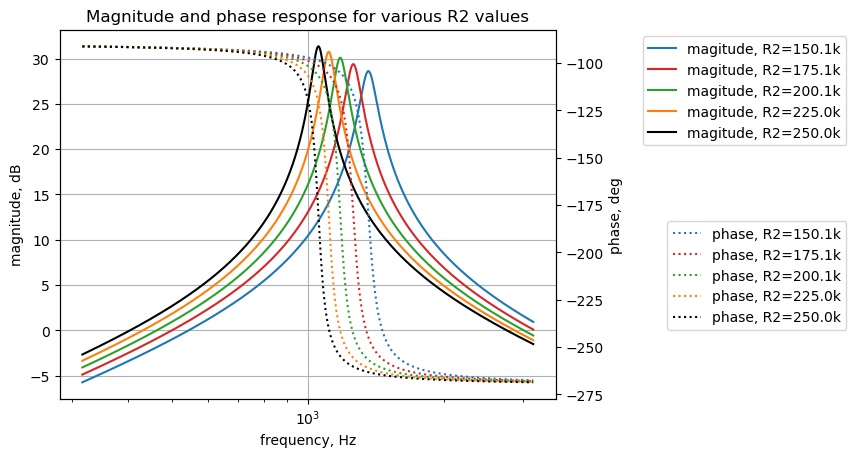

In [100]:
#| echo: false
#| fig-cap: sweep plot 1

R2_fixed_part = 150e3
R2_var_part = np.linspace(0.1,100,5)*1e3
R2_total = R2_fixed_part+R2_var_part

element_values[R3] = 10e3 # set to mid value
element_values[R1] = 10e3 # set same as R3

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

x = np.logspace(2.5, 3.5, 2000, endpoint=False)*2*np.pi

for i in range (len(R2_total)):

    element_values[R2] = R2_total[i]

    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='magitude, R2={:.1f}k'.format(R2_total[i]/1e3))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase, R2={:.1f}k'.format(R2_total[i]/1e3))  # phase plot
    
# position legends outside the graph
ax1.legend(bbox_to_anchor=(1.6,1)) # magitude legend position: relative (horizontal position, vertical position) 
ax2.legend(bbox_to_anchor=(1.6,0.5)) # phase legend position:

#ax1.set_ylim((-0.5,0))
ax1.grid()
plt.title('Magnitude and phase response for various R2 values')
plt.show()

Comments ...

The plot below shows the case where R2 is fixed at 200k and R1 = R3 = variable, 0.5k to 20k:

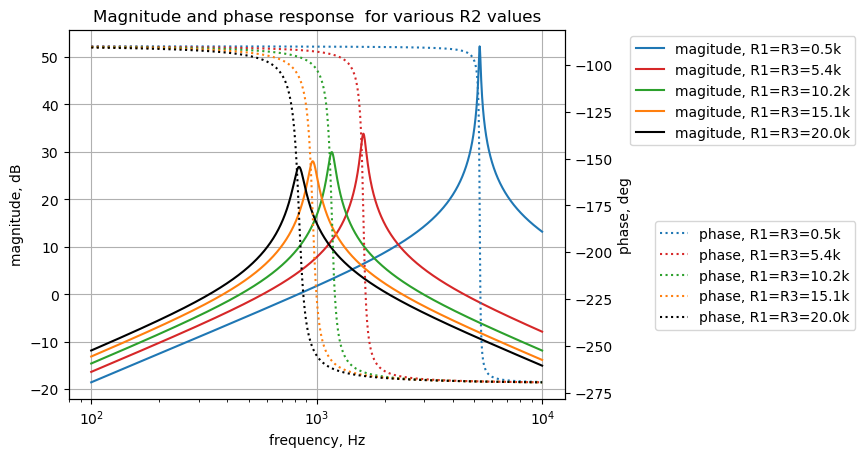

In [101]:
#| echo: false
#| fig-cap: sweep plot 2

# set R2 to mid value
R2_fixed_part = 150e3
element_values[R2] = R2_fixed_part+50e3

R3_var = np.linspace(0.5,20,5)*1e3

color_list = ['tab:blue','tab:red','tab:green','tab:orange','k']

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

x = np.logspace(2, 4, 2000, endpoint=False)*2*np.pi

for i in range (len(R3_var)):
    
    element_values[R3] = R3_var[i]
    element_values[R1] = R3_var[i]
 
    NE = NE_sym.subs(element_values)
    U = solve(NE,X)
    H = U[v2]/U[v1]
    num, denom = fraction(H) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a = np.array(Poly(num, s).all_coeffs(), dtype=float)
    b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

    w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

    # plot the results.  
    ax1.semilogx(w/(2*np.pi), mag,'-',color=color_list[i],label='magitude, R1=R3={:.1f}k'.format(R3_var[i]/1e3))    # magnitude plot
    ax2.semilogx(w/(2*np.pi), phase,':',color=color_list[i],label='phase, R1=R3={:.1f}k'.format(R3_var[i]/1e3))  # phase plot

# position legends outside the graph
ax1.legend(bbox_to_anchor=(1.6,1)) # magitude legend position: relative (horizontal position, vertical position) 
ax2.legend(bbox_to_anchor=(1.6,0.5)) # phase legend position:

#ax1.set_ylim((-0.5,0))
ax1.grid()
plt.title('Magnitude and phase response  for various R2 values')
plt.show()

comments ..

## Analysis of Filter with Calibrated Values
Using the component values from [1 tbl II], the following system of equations can be generated.

In [102]:
#| echo: false

equ_N = NE_sym.subs({R1:15e3, R2:199.5e3, R3:12.75e3 , C1:10e-9 , C2:910e-12, C3:10e-9})

# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 1.0 \cdot 10^{-8} s v_{5} + v_{1} \cdot \left(1.0 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right) - 6.6667 \cdot 10^{-5} v_{3}$</p><p>$0 = I_{O1} - 1.0 \cdot 10^{-8} s v_{3} + v_{2} \cdot \left(1.0 \cdot 10^{-8} s + 7.8431 \cdot 10^{-5}\right) - 7.8431 \cdot 10^{-5} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{2} - 9.0 \cdot 10^{-10} s v_{4} - 6.6667 \cdot 10^{-5} v_{1} + v_{3} \cdot \left(1.1 \cdot 10^{-8} s + 6.6667 \cdot 10^{-5}\right)$</p><p>$0 = - 9.0 \cdot 10^{-10} s v_{3} + v_{4} \cdot \left(1.0 \cdot 10^{-9} s + 5.013 \cdot 10^{-6}\right) - 5.013 \cdot 10^{-6} v_{5}$</p><p>$0 = - 1.0 \cdot 10^{-8} s v_{1} - 7.8431 \cdot 10^{-5} v_{2} - 5.013 \cdot 10^{-6} v_{4} + v_{5} \cdot \left(1.0 \cdot 10^{-8} s + 8.3444 \cdot 10^{-5}\right)$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

### Solve
Solve for voltages and currents in terms of Laplace variable s.

In [103]:
#| echo: false

U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- 1.08143796992481 \cdot 10^{27} V_{1} s^{2} - 7.87870411322424 \cdot 10^{30} V_{1} s}{8.53125 \cdot 10^{22} s^{3} + 7.1188080495356 \cdot 10^{26} s^{2} + 4.02108211705735 \cdot 10^{30} s + 2.45712320015725 \cdot 10^{34}}$</p><p>$v_{3} = \frac{- 1.56641604010025 \cdot 10^{26} V_{1} s^{2} + 8.19041066719085 \cdot 10^{33} V_{1}}{2.84375 \cdot 10^{22} s^{3} + 2.37293601651187 \cdot 10^{26} s^{2} + 1.34036070568578 \cdot 10^{30} s + 8.19041066719085 \cdot 10^{33}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{2.84375 \cdot 10^{22} V_{1} s^{3} - 1.48692810457516 \cdot 10^{30} V_{1} s}{2.84375 \cdot 10^{22} s^{3} + 2.37293601651187 \cdot 10^{26} s^{2} + 1.34036070568578 \cdot 10^{30} s + 8.19041066719085 \cdot 10^{33}}$</p>

### Find the Network Transfer Function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [104]:
#| echo: false

H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 1.08143796992481 \cdot 10^{27} s^{2} - 7.87870411322424 \cdot 10^{30} s}{8.53125 \cdot 10^{22} s^{3} + 7.1188080495356 \cdot 10^{26} s^{2} + 4.02108211705735 \cdot 10^{30} s + 2.45712320015725 \cdot 10^{34}}$

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [105]:
#| echo: false

H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

### Pole zero plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [106]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted.

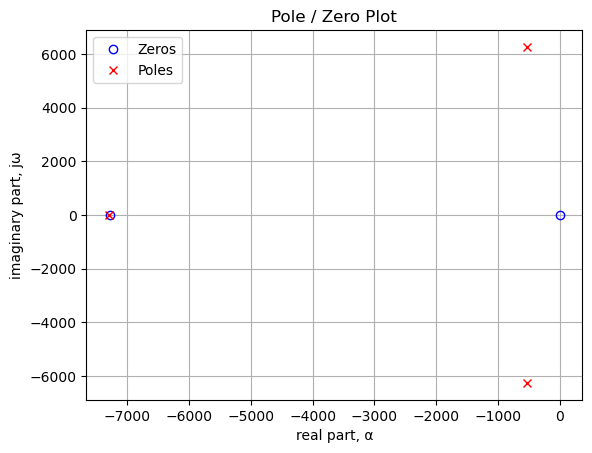

In [107]:
#| echo: false
#| fig-cap: fig cap

plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [108]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1159.51     -1161.07+0.00j
0.00         -83.49+996.53j
             -83.49-996.53j

In [109]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  --------------
-1159.51     -1161.07+0.00j
0.00         -83.49+996.53j
             -83.49-996.53j


### Magnitude and phase response
Plot the magnitude and phase of the filter's transfer function.

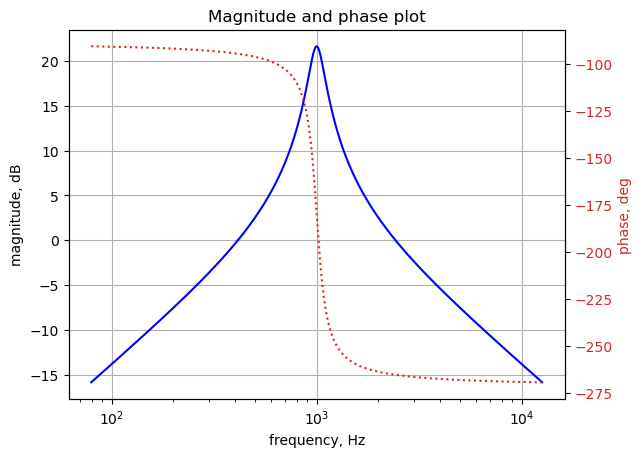

In [110]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(1.9, 4.1, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [111]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 21.6 dB at 1002.5 Hz and the -3dB frequency is 1087.3 Hz. The attenuation to the right of the peak is 35.5 dB per decade and the filter's quality factor, Q, is 6.37.


3rd order system, so cannot calculate Q from transfer function. Q in paper is 5.989

### Step response 

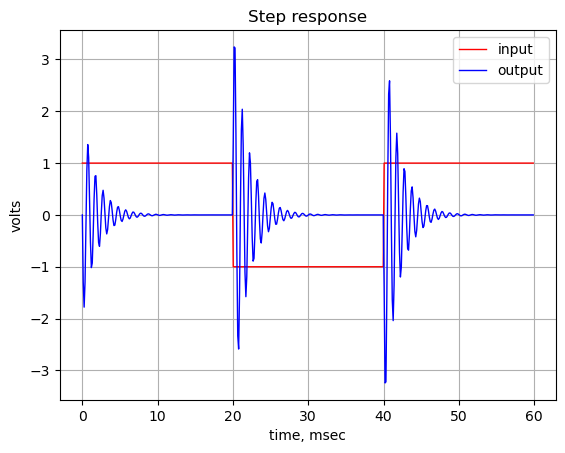

In [112]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Sensitivity Analysis
When look at a filter, especially in the context of a design review, the circuit designer will want to examine the circuit sensitivity.

Prototype Sensitivity Analysis in seperate notebook. 

Twin-T_BPF_Sensitivity_Analysis.ipynb

### Monte Carlo Tolerance Analysis

- use 1000kHz filter with values from table I

### Worst Case Tolerance Analysis

- use 1000kHz filter with values from table I

Add link to jupyterlab notebook in github.


https://github.com/Tiburonboy/EE_jupyter_notebooks/blob/main/Buchla%20Twin-T%20Active%20Filter/Twin-T_BPF_Sensitivity_Analysis.ipynb



# FILTER DESIGN EXAMPLES
This section will some through the design steps to implement a filter.

## Example 1, where $R_1 = R_3 = R$ and $C_1 = C_3 = C$
In this example, we want to design a filter with a center frequency of 1.4kHz and a filter Q of approximately 3. The filter in Figure 1 is simplified by using $R_1 = R_3 = R$ and $C_1 = C_3 = C$. Usually it's more convienient to pick capacitor values from standard values and solve for resistors. The standard values for resistors and capacitors follow the [E-Series](https://en.wikipedia.org/wiki/E_series_of_preferred_numbers) of numbers. The table below can be used to select values for C and R to put the filter response in the ball park for the desired center frequency.

| Frequency Range | C | R |
|---|---|---|
| 10 to 500 Hz | 1 $\mu$F | 10 k$\Omega$ |
| 500 to 1 kHz | 100 nF | 10 k$\Omega$ |
| 1 to 5 kHz | 10 nF | 10 k$\Omega$ |
| 5 to 10 kHz | 1 nF | 5 k$\Omega$ |

The range of Q varies and the values of C and R will need to be adjusted.

The code below will plot the range of $R_2$, $C_2$ and filter Q for a given center frequency, R and C. Note some of the lines of code were to long to display across the page, so I broke a few of the longer lines at commas and periods in the code to control where the lines are wrapped.

Standard cap values

If a manufacturer sold capacitors with all values in a range of 1 pF to 10,000 μF, the available capacitance values for E3 and E6 would be: 
E6 

Select E6 capacitor values.
```
100 pF, 150 pF, 220 pF, 330 pF, 470 pF, 680 pF,
1 nF, 1.5 nF, 2.2 nF, 3.3 nF, 4.7 nF, 6.8 nF,
10 nF, 15 nF, 22 nF, 33 nF, 47 nF, 68 nF,
100 nF, 150 nF, 220 nF, 330 nF, 470 nF, 680 nF,
1 μF, 1.5 μF, 2.2 μF, 3.3 μF, 4.7 μF, 6.8 μF, 10 μF
```

look at the above equation it make no difference if C or C2 is varied and the other R is solved for.




10k$\Omega$


```
10 to 500 Hz
freq = .1 # kHz
C_value = 10e-7
R_value = 10e3

1k to 5 k
freq = 5 # kHz
C_value = 10e-9
R_value = 10e3

5k to 10k
freq = 10 # kHz
C_value = 10e-10
R_value = 5e3
```

Plot R2 and Q on same graph

Example filter specification:

- freq: 5kHz
- Q = 2 
- Standard value capacitors

with $R_1 = R_3 = R$ and $C_1 = C_3 = C$

Above this section, the circuit and componets are the ones in the paper, below is a few different cases. 


$\large{\color {red} {\text{Need a better section heading title.}}}$  

## Combinations of substitutions
Verify equations 7 and 8 in the paper.

The paper indicates that a substitution of R1=R3 and C1=C3 can be made to simplifiy the circuit. The table below explores this idea by attemping to review all possoble combinations of setting components equal to see if any second order systems result. As shown in the table below only when R1=R3 or C1=C3 does a second order system result. The cancelation of a pole and zero in the transfer function was not obious for many of these attempted simplications and building an exhaustive table seemed easier than constructing an algebraic proof. 


$\large{\color {red} {\text{Can a design alogrithum be developed such that}}}$  
$\large{\color {red} {\text{$\omega_n$, Q and gain be specified over a wide arbitrary range?}}}$  


This was already done above. see NE_sym_reduced_complexity

$\large{\color {red} {\text{rewrite this section and organize better}}}$  

## Investigate range of allowable initial guesses, case: R1:R, R3:R, C1:C, C3:C

plot $\omega_n$ versus R,R2,C2, given C

solve omega_sys-desired freq, for given C: plot solution for a range of R, R2, C2.

R and R2 range 1k to 250k

Plot C2n vs R2 for R2 10k to 100k

## Plots solving for R2, given C2 standard values

Standard cap values

If a manufacturer sold capacitors with all values in a range of 1 pF to 10,000 μF, the available capacitance values for E3 and E6 would be: 
E6 

Select E6 capacitor values.
```
100 pF, 150 pF, 220 pF, 330 pF, 470 pF, 680 pF,
1 nF, 1.5 nF, 2.2 nF, 3.3 nF, 4.7 nF, 6.8 nF,
10 nF, 15 nF, 22 nF, 33 nF, 47 nF, 68 nF,
100 nF, 150 nF, 220 nF, 330 nF, 470 nF, 680 nF,
1 μF, 1.5 μF, 2.2 μF, 3.3 μF, 4.7 μF, 6.8 μF, 10 μF
```

Usually it's convienient to pick capacitor values from standard values and solve for resistors. since it's easer to combine resistors to get the desired value.

https://en.wikipedia.org/wiki/E_series_of_preferred_numbers



look at the above equation it make no difference if C or C2 is varied and the other R is solved for.

E6_cap_pF_list = np.array([100, 150, 220, 330, 470, 680])*1e-12
E6_cap_nF_list = np.array([1, 1.5, 2.2, 3.3, 4.7, 6.8, 10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470, 680])*1e-9
E6_cap_uF_list = np.array([1, 1.5, 2.2, 3.3, 4.7, 6.8, 10])*1e-6

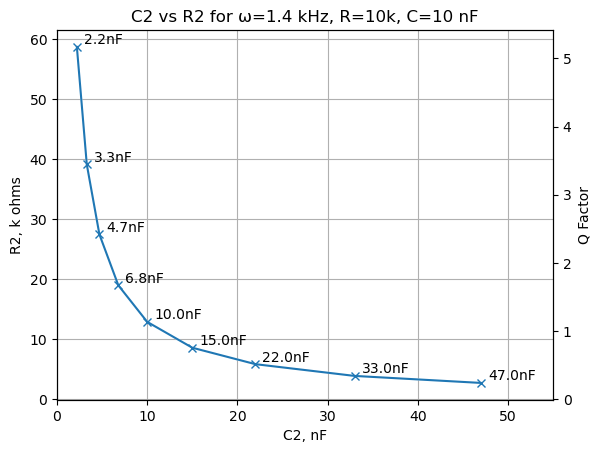

In [113]:
#| echo: true
#| fig-cap: C2 and R2 for frequency and R and C

E6_cap_nF_list = np.array([2.2, 3.3, 4.7, 6.8, 10, 15, 22, 33, 47])*1e-9

C2_plot = E6_cap_nF_list

R2_plot = np.zeros(len(C2_plot))
Q_plot = np.zeros(len(C2_plot))

freq = 1.4 # kHz
C_value = 10e-9
R_value = 10e3

fig, ax1 = plt.subplots()

# solve for R2 for each C2 in the capacitor list
for i in range(len(C2_plot)):
    R2_plot[i] = solve(omega_n.subs({R:R_value, C2:C2_plot[i],
        C:C_value})-2*np.pi*freq*1e3,R2)[0]
    Q_plot[i] = Q_factor.subs({R:R_value, R2:R2_plot[i],
        C:C_value, C2:C2_plot[i]})
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,
        R2_plot[i]/1e3), xytext=(5,2), textcoords='offset points')

ax1.set_ylabel('R2, k ohms')
ax1.set_xlabel('C2, nF')

# set the color to white to hide the plot
plt.plot(C2_plot*1e9,R2_plot/1e3,'x-w')
plt.xlim((0,55))

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

plt.plot(C2_plot*1e9,Q_plot,'x-')

ax2.set_ylabel('Q Factor',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('C2 vs R2 for \u03C9={:.1f} kHz, R={:.0f}k, C={:,.0f} nF'.
    format(freq, R_value/1e3,C_value*1e9))
plt.show()

In the code above the center freqiency is set by assigng a value to the variable, in this case ```freq = 1.4```, which has units of kHz.  The desired Q is about 3, so $C_2=4.7$ nF is chosen.

The plot below shows the filter's peak amplitude versus the value of $C_2$.

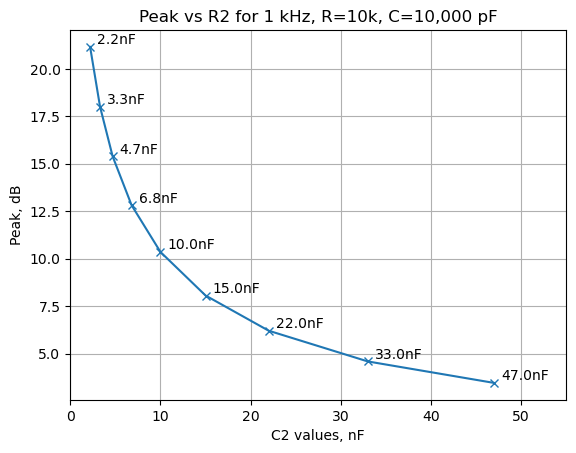

In [114]:
#| echo: false
#| fig-cap: fig cap

peak_plot = np.zeros(len(C2_plot))

for i in range(len(C2_plot)):
    peak_plot[i] = 20*np.log10(float(abs(H_sym_reduced_complexity.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:1j*2*np.pi*freq*1e3}))))
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,peak_plot[i]), xytext=(5,2), textcoords='offset points')

plt.plot(C2_plot*1e9,peak_plot,'x-')
plt.xlim((0,55))

plt.xlabel('C2 values, nF')
plt.ylabel('Peak, dB')
plt.title('Peak vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

We can choose the value of C2, which is $C_2=4.7$nF and solve for $R_2$.

In [115]:
#| echo: true
C2_value = 4.7e-9

R2_value = solve(omega_n.subs({R:R_value, C2:C2_value,
    C:C_value})-2*np.pi*freq*1e3,R2)[0]
Markdown('$R_2={:.3f}k$'.format(R2_value/1e3))

$R_2=27.497k$

The value happens to be very close to a standard value 1% metal film resistor. Setting $R_2$ equal to ```27,500```.

In [116]:
#| echo: true
R2_value = 27500

The plot of the magnitude and phase are shown below.

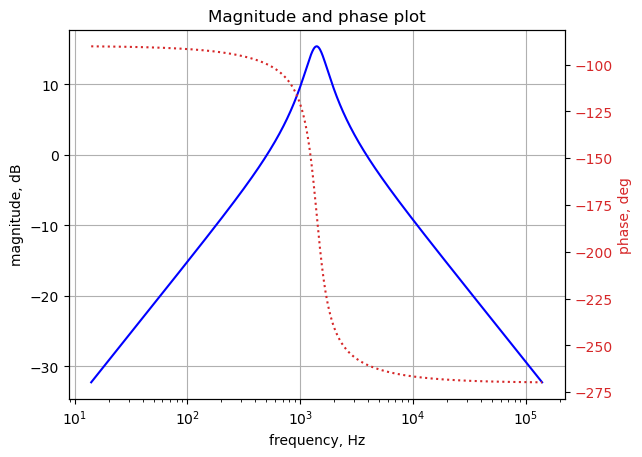

In [117]:
#| echo: false
#| fig-cap: fig cap

num, denom = fraction(H_sym_reduced_complexity.subs({R:R_value, R2:R2_value, C:C_value, C2:C2_value}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

x = np.logspace(np.log10(freq*1e3)-2, np.log10(freq*1e3)+2, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [118]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 15.4 dB at 1393.6 Hz and the -3dB frequency is 1722.7 Hz. The attenuation to the right of the peak is 27.6 dB per decade and the filter's quality factor, Q, is 2.49.


The filter Q factor can also be calucated from the element values. 

In [119]:
Markdown('Calculated Q factor: {:.3f}'.format(N(Q_factor.subs({R:15000,R2:186000,C:1e-8,C2:9.1e-10}))))

Calculated Q factor: 11.673

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

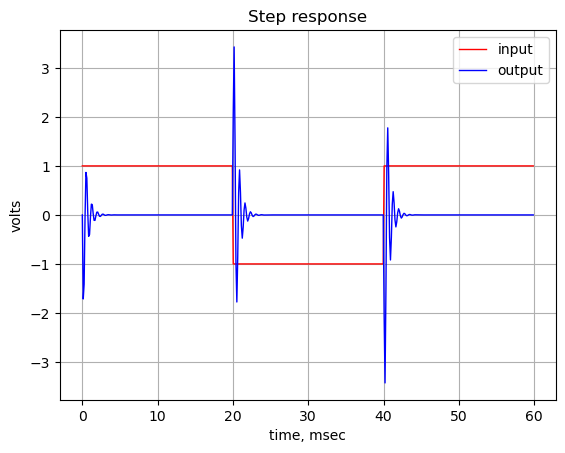

In [120]:
#| echo: false
#| fig-cap: fig cap

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
sys_tf = signal.TransferFunction(a,b)

# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Example x, 5th Order Filter
Cascade of second order stages and a first order. 

Filter specification

- freq: 5kHz
- Butterworth 

## Example 2, Arbitrary Pole Locations
In this example given capacitor values and the pole locations, the values of the resistors are obtained with the help of SymPy's solver function. Three variables $p_1$, $p_2$ and $p_3$ are decleared, which are the three poles of the charactic polyniminal. 

In [121]:
#| echo: false
p1, p2, p3 = symbols('p1 p2 p3') # system poles

I'll write the charactic polyniminal in the form, $(s+p_1)(s+p_2)(s+p_3)$. The code below expands and collects the terms of the equation

In [122]:
#| echo: true
d_equ = expand((s+p1)*(s+p2)*(s+p3)).collect(s)
Markdown('${:s}$'.format(latex(d_equ)))

$p_{1} p_{2} p_{3} + s^{3} + s^{2} \left(p_{1} + p_{2} + p_{3}\right) + s \left(p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}\right)$

The coefficients of the variable $s$ are:

In [123]:
#| echo: false
d3 = d_equ.coeff(s**3)
d2 = d_equ.coeff(s**2)
d1 = d_equ.coeff(s**1)
d0 = d_equ - d1*s*1 - d2*s**2 - d3*s**3
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=1$</p><p>$d_2=p_{1} + p_{2} + p_{3}$</p><p>    $d_1=p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}$</p><p>$d_0=p_{1} p_{2} p_{3}$</p>

Divideing each term by $d_0$, we get the coeeficients in conanical form.

In [124]:
#| echo: false
d3=d3/d0
d2=d2/d0
d1=d1/d0
d0=d0/d0
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=\frac{1}{p_{1} p_{2} p_{3}}$</p><p>$d_2=\frac{p_{1} + p_{2} + p_{3}}{p_{1} p_{2} p_{3}}$</p><p>    $d_1=\frac{p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}}{p_{1} p_{2} p_{3}}$</p><p>$d_0=1$</p>

The coeeficients of the filter's charactic equation were obtained above and are:

In [125]:
#| echo: false
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

The `scipy.signal` module provides a set of tools for designing and analyzing analog filters. The SciPy functions to design classic analog filters:

- `scipy.signal.buttap`: Butterworth filter
- `scipy.signal.cheb1ap`: Chebyshev type I filter
- `scipy.signal.cheb2ap`: Chebyshev type II filter
- `scipy.signal.besselap`: Bessel filter

These function return (z,p,k) for an analog prototype filter; the second parameter, p, are the poles of the filter. Commenting out the other filter types, we can use ```cheb2ap``` to calculate the pole locations for this type of filter.

In [126]:
#| echo: true
N = 3 # filter order
Wn = 1 # normalised frequency

#filter_param = signal.besselap(N)
#filter_param = signal.buttap(N)
rp = 0.8
rs = 5.0
#filter_param = signal.cheb1ap(N,rp)
filter_param = signal.cheb2ap(N,rs)

The pole loactions are tabulated below.

In [127]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Pole #', 'Value, rad/s']
table_row = []
k = 1
for i in filter_param[1]:
    m = '{:d}'.format(k)
    p = '{:.2f}'.format(i)
    table_row.append([m,p])
    k+=1

Markdown(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

Pole #    Value, rad/s
--------  --------------
1         -0.22-1.02j
2         -2.48-0.00j
3         -0.22+1.02j

In [128]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header, colalign = ('left','left'), tablefmt="simple"))

Pole #    Value, rad/s
--------  --------------
1         -0.22-1.02j
2         -2.48-0.00j
3         -0.22+1.02j


In the code below the normalized values of $C_1$, $C_2$ and $C_3$ were chosen arbitraillery. It might be necessary to adjust these values if the resistor values don't end up being positive real numbers. The poles can be a calculated from SciPy filter functions or chosen to be either three postive real numbers or one positive real number and a pair of complex conjegate numbers. 

The values for the poles are entered into the code as positive numbers, but ...

In [129]:
#| echo: true
C1_value = 0.7
C2_value = 0.2
C3_value = 0.3
p1_value = -filter_param[1][0] #(1-1j*1)
p2_value = -filter_param[1][1] #(1+1j*1)
p3_value = -filter_param[1][2] #1.2

sub_values = {C1:C1_value, C2:C2_value, C3:C3_value, p1:p1_value,
    p2:p2_value, p3:p3_value}

Equatting the coefficients of $s$ we get:

$d_1 = a_1$

$d_2 = a_2$

$d_3 = a_3$

In the expaned version of these equation, we see that there are three equations and three unknowns, which are $R_1$, $R_2$ and $R_3$, since the values for the capacitors and poles have been assigned.

$d_3=\frac{1}{p_{1} p_{2} p_{3}} = a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$

$d_2=\frac{p_{1} + p_{2} + p_{3}}{p_{1} p_{2} p_{3}} = a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$

$d_1=\frac{p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}}{p_{1} p_{2} p_{3}} = a_1=C_{2} R_{1} + C_{3} R_{1}$

Using the SymPy function ```solve```, to solve for the resistor values, the solution is:

In [130]:
#| echo: true
sol_values = solve(((d3-a3).subs(sub_values), (d2-a2).subs(sub_values),
    (d1-a1).subs(sub_values)),(R1,R2,R3))
Markdown('${:s}$'.format(latex(sol_values[0])))

$\left( 1.61172938442011, \  0.51227330881633, \  10.6011406578226\right)$

There are two solutions, so we can just arbitraility chose the first one. Using the second solution means that the value for $R_2$ and $R_3$ are swapped.  

In [131]:
#| echo: true
R1_value = sol_values[0][0]
R2_value = sol_values[0][1]
R3_value = sol_values[0][2]

The values for the resistors can be put into the newtork equations, which are displayed below.

In [132]:
#| echo: true
equ_N_ex2 = NE_sym.subs({R1:R1_value, R2:R2_value, R3:R3_value,
    C1:C1_value, C2:C2_value, C3:C3_value})

# display the equations
temp = ''
for i in range(shape(equ_N_ex2.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N_ex2.rhs[i]),
        latex(round_expr(equ_N_ex2.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 0.7 s v_{5} + v_{1} \cdot \left(0.7 s + 0.620451553\right) - 0.620451553 v_{3}$</p><p>$0 = I_{O1} - 0.3 s v_{3} + v_{2} \cdot \left(0.3 s + 0.094329472\right) - 0.094329472 v_{5}$</p><p>$0 = - 0.3 s v_{2} - 0.2 s v_{4} - 0.620451553 v_{1} + v_{3} \cdot \left(0.5 s + 0.620451553\right)$</p><p>$0 = - 0.2 s v_{3} + v_{4} \cdot \left(0.2 s + 1.952082966\right) - 1.952082966 v_{5}$</p><p>$0 = - 0.7 s v_{1} - 0.094329472 v_{2} - 1.952082966 v_{4} + v_{5} \cdot \left(0.7 s + 2.046412438\right)$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

Solving for voltages and currents in terms of Laplace variable $s$, we get:

In [133]:
#| echo: false
U_ex2 = solve(equ_N_ex2,X)

temp = ''
for i in U_ex2.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_ex2[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- 1.54018451100814 \cdot 10^{44} V_{1} s^{2} - 2.20352198180951 \cdot 10^{44} V_{1} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p><p>$v_{3} = \frac{- 8.19874845657021 \cdot 10^{43} V_{1} s^{2} + 2.28498601678766 \cdot 10^{43} V_{1}}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{8.4 \cdot 10^{42} V_{1} s^{3} - 2.34107469483772 \cdot 10^{42} V_{1} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [134]:
#| echo: false
H_ex2 = (U_ex2[v2]/U_ex2[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_ex2)))

$H(s)=\frac{- 1.54018451100814 \cdot 10^{44} s^{2} - 2.20352198180951 \cdot 10^{44} s}{8.4 \cdot 10^{42} s^{3} + 2.45569492532383 \cdot 10^{43} s^{2} + 1.84138955312286 \cdot 10^{43} s + 2.28498601678766 \cdot 10^{43}}$

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [135]:
#| echo: false
H_num_ex2, H_denom_ex2 = fraction(H_ex2) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num_ex2, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom_ex2, s).all_coeffs(), dtype=float)
sys_tf_ex2 = signal.TransferFunction(a,b)

The poles and zeros of the transfer function are plotted below:

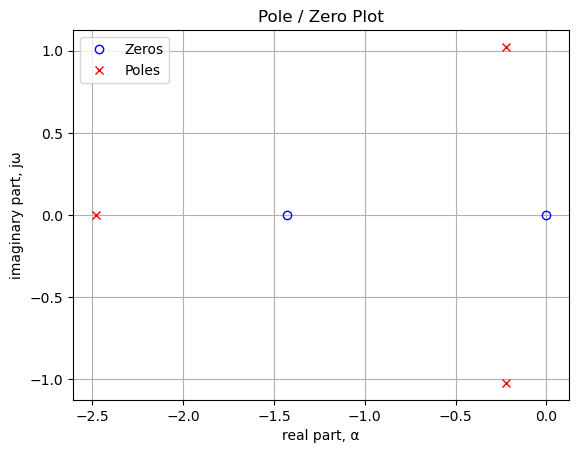

In [136]:
#| echo: false
#| fig-cap: fig cap
sys_zeros_ex2 = np.roots(sys_tf_ex2.num)
sys_poles_ex2 = np.roots(sys_tf_ex2.den)

plt.plot(np.real(sys_zeros_ex2), np.imag(sys_zeros_ex2), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles_ex2), np.imag(sys_poles_ex2), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The units of the poles and zeros are in radian frequency and are tabulated below.

In [137]:
#| echo: false
#| tbl-cap: table of poles and zeros

table_header = ['Zeros, rad/s', 'Poles, rad/s']
num_table_rows = max(len(sys_zeros_ex2),len(sys_poles_ex2))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.2f}'.format(sys_zeros_ex2[i])
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.2f}'.format(sys_poles_ex2[i])
    else:
        p = ''
    table_row.append([z,p])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-1.43           -2.48+0.00j
0.00            -0.22+1.02j
                -0.22-1.02j

In [138]:
# printing the table only for Jupyter Lab 
print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, rad/s    Poles, rad/s
--------------  --------------
-1.43           -2.48+0.00j
0.00            -0.22+1.02j
                -0.22-1.02j


The values of the poles network are the same a chosen above, thus validating the solution.

The magnitude and phase of the filter's transfer function is plotted below.

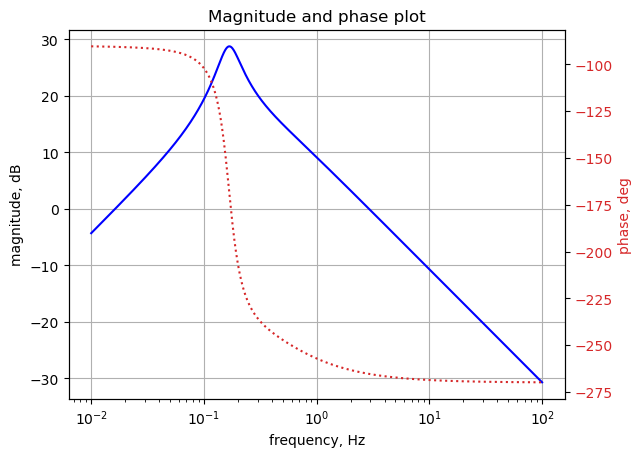

In [139]:
#| echo: false
#| fig-cap: fig cap

x = np.logspace(-2, 2, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(sys_tf_ex2, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [140]:
#| echo: false
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)

exp_value = np.log10(max_gain_freq)
index_pluse_one_decade = np.where(w/(2*np.pi) > 10**(exp_value+1))[0][0]

Markdown('The filter has a maximum gain of {:.1f} dB at {:.2f} Hz'.format(max_gain, max_gain_freq) +\
' and the -3dB frequency is {:.1f} Hz.'.format(freq_3dB) +\
' The attenuation to the right of the peak is {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[index_pluse_one_decade]) +\
' and the filter\'s quality factor, Q, is {:.2f}.\n'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

The filter has a maximum gain of 28.7 dB at 0.17 Hz and the -3dB frequency is 0.2 Hz. The attenuation to the right of the peak is 24.0 dB per decade and the filter's quality factor, Q, is 2.43.


The step response is plotted below.

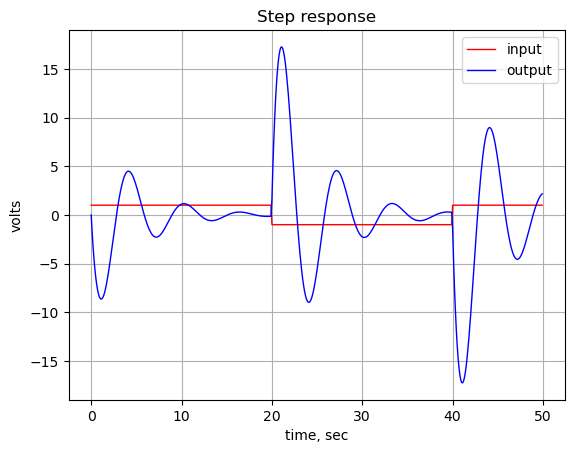

In [141]:
#| echo: false
#| fig-cap: fig cap

# define the time interval and create a square wave step waveform.
t = np.linspace(0, 50, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5)

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf_ex2, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

The values of the resistors and capacitors can be frequency scaled to put the center frequency of the filter at a different location in the frequency domain. 

# RELATED TOPICS
Some of this section seems to be an expansion of the main topic. Probably omit this section otherwise the report will be too long to write and finish.

- Can $\omega_n$, Q and gain, be specified independently?
  - solving for coefficients - only of limited usefilness, not a geneneral design method
  - example code from below
- More common Twin-T configurations
  - see app notes on twin T: page 16-37 /home/jeff64/Downloads/filterdesign.pdf
  - twin-T references
- How many permutations of the circuit are useful?
  - re-draw the schematic with Rs for all the components
  - substitute Cs for various Rs - does anything interesting result?
  - LP, HP and BR filters
- low pass to band pass transformation $s=\frac{s^2+\omega_n^2}{bw*s}$
- Other arrangements of Rs and Cs

https://electronics.stackexchange.com/questions/447596/how-to-calculate-damping-ratio-and-natural-frequency-of-a-high-order-system

Systems that are higher order are composed of smaller poles, so you can find the dominant poles (I'd use a bode plot and find the peaks, if any) to find the natural frequency. As far as I know, there is no damping ratio for higher order systems (it is dependent on the smaller order systems). Overshoot is best found by simulating (with a step input).

Do a partial faction decomposition and look at the resultant second (complex) or first order systems.

# RESULTS
This report has shown that with the help of Python and SymPy electric circuits can be easily analyzed using a mixture of symbolic and numerical methods when following the template presented in this report. 
A JupyterLab notebook can be used as the “source code” for publishing reports or documents with the help of Quarto. 

Analytical expressions were derived for network equations. SymPy was used to solve for the node voltages along with obtaining equations for the poles and zeros. The expressions for the poles in symbolic form are rather long and do not provide much insight into the operation of the filter. 

The filter’s transfer function naturally has two zeros and three poles which can be reduced to a second order network with constraint of $R_1 = R_3$ and $C_1 = C_3$. The simplified case was analyzed with symbolic coefficients. After substituting the values for the circuit elements the analysis continued.

# DISCUSSION
The advantages of this filter over other types is than it uses only one Op Amp. By employing the simplification described above, a band pass filter with a given center frequency and Q factor is relatively simple to design sing all of the algebra, calculations and plotting is performed  with the help of Python modules. By using the JupyterLab notebook various candatidate filter topologies can be evaluated and compared. 

Obtaining analytic expressions for this filter do not appear to be that useful, but are easily obtained with the Python code presented in this report. Most scholarly publications include some analytic expressions and the code presented here can easily generate some of those expressions.

Generating a PDF document from the JupyterLab notebook is easy, however, if particular formatting is required, as for example many journal publications require, additional work would be required. Some online advice is only to use the JupyterLab notebook and Quarto for first and second drafts and then to export the report material to LaTex for publication.

# CONCLUSION
The use of JupyterLab, Python and Quarto provide a convenient work flow for analyzing electric circuits and presenting the results in a PDF. 

add comments on the following:

- analysis of alternatives
- design review documentation
- compare with LTSpice

# REFERENCES {.unnumbered}
[1] Aaron D. Lanterman, "A Bandpass Twin-T Active Filter Used in the Buchla 200 Electric Music Box Synthesizer", https://arxiv.org/abs/2411.11358, last accessed Jan 20, 2025.  
[2] C. Ho and A. Ruehli and P. Brennan, "The modified nodal approach to network analysis", IEEE Transactions on Circuits and Systems, 1975  
[3] M. Hayes, Lcapy: symbolic linear circuit analysis with Python, PeerJ. Computer science, 2022, https://doi.org/10.7717/peerj-cs.875  
[4] Buchla Electronic Musical Instruments, Schematic, 10 Chan. Comb Filter Model 295(A), http://fluxmonkey.com/historicBuchla/295-10chanfilt.htm, last accessed Feburary, 24, 2025  
[5] O. Palusinski, Automatic Formulation of Circuit Equations,  
https://www2.engr.arizona.edu/~ece570/session3.pdf, last accessed January 11, 2024  
[x] Tiburonboy, Symbolic Modified Nodal Analysis using Python,  
https://tiburonboy.github.io/Symbolic-Modified-Nodal-Analysis-using-Python/,  
last accessed Feburary, 24, 2025  

# License {.unnumbered}
This work (includes python code, documentation, test circuits, etc.) is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).  

- Share — Copy and redistribute the material in any medium or format.
- Adapt — Remix, transform, and build upon the material for any purpose, even commercially.
- Attribution — You must give [appropriate credit](https://creativecommons.org/licenses/by-sa/4.0/#ref-appropriate-credit), provide a link to the license, and [indicate if changes were made](https://creativecommons.org/licenses/by-sa/4.0/#ref-indicate-changes). You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
- ShareAlike — If you remix, transform, or build upon the material, you must distribute your contributions under the [same license](https://creativecommons.org/licenses/by-sa/4.0/#ref-same-license) as the original.

![](https://i.creativecommons.org/l/by-sa/4.0/88x31.png)

# experimental code
This code examines where the poles and zeros end up at for normalized element values.

In [142]:
example_net_list = '''
* Twin-T-variations.asc
R1 3 1 5
R2 4 5 3
R3 2 5 1
C1 5 1 0.5
C2 4 3 0.3
C3 2 3 0.2
V1 1 0 1
O1 4 0 2
.backanno
.end
'''

## Generate network equations 
Call smna() to generate the network equations.

In [143]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

Generate markdown text to display the network equations.

As a test the code is hidden in the output. echo is false for this code cell

In [144]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))

Markdown(temp)

<p>$0 = - C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}}$</p><p>$0 = - C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}}$</p><p>$0 = - C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$</p><p>$0 = - C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}}$</p><p>$0 = - C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}}$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

Switching the position of the equal sign.

Turn the free symbols into SymPy variables and build a dictionary of element values.

In [145]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

## Solve the Network Equations

In [146]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

<p>$v_{1} = V_{1}$</p><p>$v_{2} = \frac{- C_{1} C_{2} R_{1} R_{3} V_{1} s^{2} - C_{1} C_{2} R_{2} R_{3} V_{1} s^{2} - C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} - C_{1} R_{3} V_{1} s - C_{2} R_{2} V_{1} s - C_{2} R_{3} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{3} = \frac{- C_{1} C_{3} R_{1} R_{3} V_{1} s^{2} + V_{1}}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p><p>$v_{4} = 0$</p><p>$v_{5} = \frac{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} V_{1} s^{3} - C_{2} R_{2} V_{1} s}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + C_{2} C_{3} R_{1} R_{2} s^{2} + C_{2} C_{3} R_{1} R_{3} s^{2} + C_{2} R_{1} s + C_{3} R_{1} s + 1}$</p>

### Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [147]:
H_sym = cancel(U_sym[v2]/U_sym[v1],s)
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)}{C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1}$

In [148]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

### Numerator polynominal

In [149]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=s^{2} \left(- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}\right) + s \left(- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}\right)$

Get coef of numerator poly

$b_2s^{2}+b_1s+b_0$

In [150]:
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = H_sym_num - b1*s*1 - b2*s**2

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$\
    </p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=- C_{1} C_{2} R_{1} R_{3} - C_{1} C_{2} R_{2} R_{3} - C_{1} C_{3} R_{1} R_{3}$</p><p>$b_1=- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}$    </p><p>$b_0=0$</p>

Find the roots of the numerator

In [151]:
num_root_sym = solve(H_sym_num,s)

In [152]:
Markdown('${:s}$'.format(latex(num_root_sym[0])))

$0$

In [153]:
Markdown('${:s}$'.format(latex(num_root_sym[1])))

$\frac{- C_{1} R_{3} - C_{2} R_{2} - C_{2} R_{3}}{C_{1} R_{3} \left(C_{2} R_{1} + C_{2} R_{2} + C_{3} R_{1}\right)}$

### denominator polynominal

Pull out the coefficients of the denominator polynomiban, also called the characteristic equation. Get a3, a2, a1, a0

$a_3s^3+a_2s^2+a_1s+a_0$

In [154]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3} s^{3} + s^{2} \left(C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}\right) + s \left(C_{2} R_{1} + C_{3} R_{1}\right) + 1$

In [155]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

## Numerical Analysis
Substitue the element values from the net list into the equations and solve for unknown node voltages and currents.

Element values used are the ones shown on Figure 1.

The function [round_expr()](https://stackoverflow.com/questions/48491577/printing-the-output-rounded-to-3-decimals-in-sympy) (from stackoverflow) is used to display fewer digits.

In [156]:
element_values

{C₁: 0.5, C₂: 0.3, C₃: 0.2, O₁: nan, R₁: 5.0, R₂: 3.0, R₃: 1.0, V₁: 1.0}

In [157]:
for k,v in element_values.items():
    print(k, v)

V1 1.0
R1 5.0
R2 3.0
R3 1.0
C1 0.5
C2 0.3
C3 0.2
O1 nan


In [158]:
equ_N = NE_sym.subs(element_values)

# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 0.5 s v_{5} + v_{1} \cdot \left(0.5 s + 0.2\right) - 0.2 v_{3}$</p><p>$0 = I_{O1} - 0.2 s v_{3} + v_{2} \cdot \left(0.2 s + 1.0\right) - 1.0 v_{5}$</p><p>$0 = - 0.2 s v_{2} - 0.3 s v_{4} - 0.2 v_{1} + v_{3} \cdot \left(0.5 s + 0.2\right)$</p><p>$0 = - 0.3 s v_{3} + v_{4} \cdot \left(0.3 s + 0.333333333\right) - 0.333333333 v_{5}$</p><p>$0 = - 0.5 s v_{1} - 1.0 v_{2} - 0.333333333 v_{4} + v_{5} \cdot \left(0.5 s + 1.333333333\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = v_{4}$</p>

### Solve
Solve for voltages and currents in terms of Laplace variable s.

In [159]:
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{- 34.0 s^{2} - 34.0 s}{9.0 s^{3} + 24.0 s^{2} + 50.0 s + 20.0}$</p><p>$v_{3} = \frac{20.0 - 10.0 s^{2}}{9.0 s^{3} + 24.0 s^{2} + 50.0 s + 20.0}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{9.0 s^{3} - 18.0 s}{9.0 s^{3} + 24.0 s^{2} + 50.0 s + 20.0}$</p>

### Find the network transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [160]:
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 34.0 s^{2} - 34.0 s}{9.0 s^{3} + 24.0 s^{2} + 50.0 s + 20.0}$

In [161]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [162]:
sys_tf = signal.TransferFunction(a,b)

### Pole zero plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [163]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the transfer function are plotted.

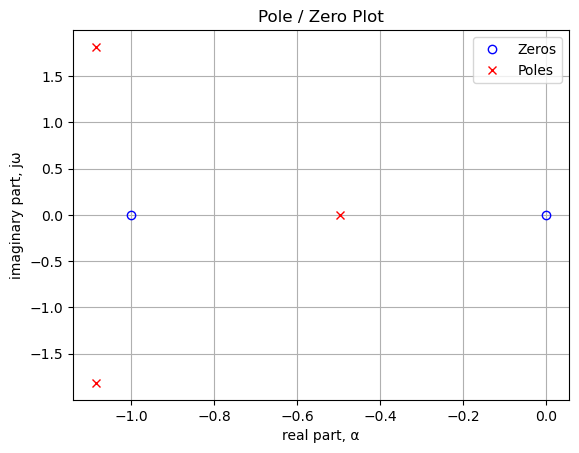

In [164]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [165]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of zeros: 2
-0.159 Hz
0.000 Hz


In [166]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of poles: 3
-0.173+0.289j Hz
-0.173-0.289j Hz
-0.079+0.000j Hz


### Magnitude and phase response
Plot the magnitude and phase of the filter's transfer function.

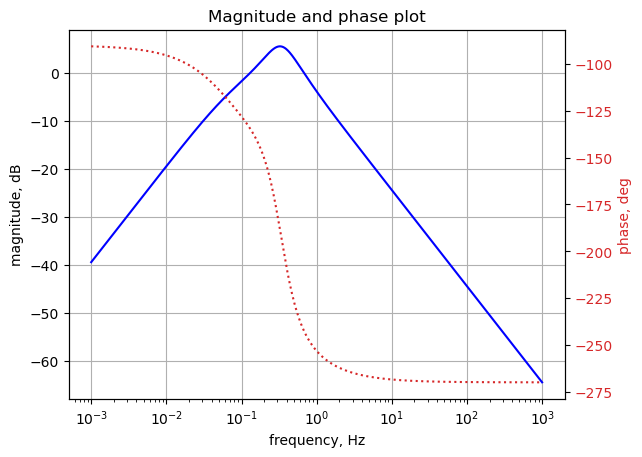

In [167]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(-3, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [168]:
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

#print('attenuation: {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[-1]))

print('Q = {:.2f}'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

max gain: 5.5 dB at 0.3 Hz
-3dB frequency: 0.5 Hz
Q = 0.95


### Step response    

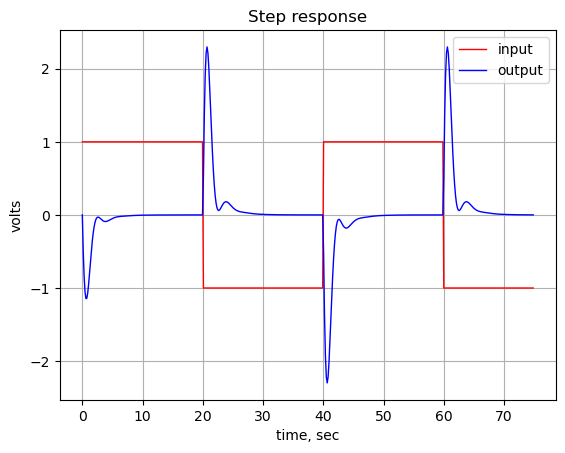

In [169]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 75.0, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Can the numerator roots be put at an arbutrary location?
Having some dificulty in puting poles and zeros in arbitrary locations, negative element values result.

I think the terms in the numerator should have neg signs

In [170]:
numerator = -s*(s+2)
numerator

In [171]:
numerator_poly = expand(numerator)
numerator_poly

In [172]:
d2 = numerator_poly.coeff(s**2)
d1 = numerator_poly.coeff(s**1)

In [173]:
d2

In [174]:
d1

In [175]:
b2

In [176]:
b1

Can the denominator poly roots be arranged on a circle or elipse and then component values be solved for?

In [177]:
# this works
denominator = (s+1)*(s+2+1j*3/4)*(s+2-1j*3/4)
denominator

In [178]:
denominator_poly = expand(denominator)
denominator_poly

In [179]:
c3 = denominator_poly.coeff(s**3)
c2 = denominator_poly.coeff(s**2)
c1 = denominator_poly.coeff(s**1)
c0 = denominator_poly - c1*s*1 - c2*s**2 - c3*s**3

In [180]:
c1

In [181]:
a3

In [182]:
a2

In [183]:
a1

In [184]:
a0

adding in the numerator

In [185]:
values = solve((a3-c3/c0,a2-c2/c0,a1-c1/c0,b2-d2,b1-d1),(R1,R2,R3,C1,C2))
values

The line below seems to work

In [186]:
R1_solution = values[0][0].subs({C3:0.5})
R1_solution

In [187]:
R2_solution = values[0][1].subs({C3:0.5})
R2_solution

In [188]:
R3_solution = values[0][2].subs({C3:0.5})
R3_solution

In [189]:
C1_solution = values[0][3].subs({C3:0.5})
C1_solution

In [190]:
C2_solution = values[0][4].subs({C3:0.5})
C2_solution

Put the values calculated above back into the net list

In [191]:
example_net_list = '''
* Twin-T-variations.asc
R1 3 1 1
R2 4 5 1
R3 2 5 1
C1 5 1 1
C2 4 3 1
C3 2 3 1
V1 1 0 1
O1 4 0 2
.backanno
.end
'''

## Generate network equations 
Call smna() to generate the network equations.

In [192]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

Generate markdown text to display the network equations.

As a test the code is hidden in the output. echo is false for this code cell

In [193]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))

Markdown(temp)

<p>$0 = - C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}}$</p><p>$0 = - C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}}$</p><p>$0 = - C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$</p><p>$0 = - C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}}$</p><p>$0 = - C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}}$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

Switching the position of the equal sign.

Turn the free symbols into SymPy variables and build a dictionary of element values.

In [194]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

## Solve the Network Equations

## Numerical Analysis
Substitue the element values from the net list into the equations and solve for unknown node voltages and currents.

Element values used are the ones shown on Figure 1.

The function [round_expr()](https://stackoverflow.com/questions/48491577/printing-the-output-rounded-to-3-decimals-in-sympy) (from stackoverflow) is used to display fewer digits.

In [195]:
element_values[R1] = R1_solution
element_values[R2] = R2_solution
element_values[R3] = R3_solution
element_values[C1] = C1_solution
element_values[C2] = C2_solution
element_values[C3] = 0.5

In [196]:
for k,v in element_values.items():
    print(k, v)

V1 1.0
R1 1.33469638110816
R2 1.01292511492722
R3 0.799416389721975
C1 0.447630473750175
C2 0.906096813725490
C3 0.5
O1 nan


In [197]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

In [198]:
equ_N = NE_sym.subs(element_values)

# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - 0.447630474 s v_{5} + v_{1} \cdot \left(0.447630474 s + 0.749234069\right) - 0.749234069 v_{3}$</p><p>$0 = I_{O1} - 0.5 s v_{3} + v_{2} \cdot \left(0.5 s + 1.250912557\right) - 1.250912557 v_{5}$</p><p>$0 = - 0.5 s v_{2} - 0.906096814 s v_{4} - 0.749234069 v_{1} + v_{3} \cdot \left(1.406096814 s + 0.749234069\right)$</p><p>$0 = - 0.906096814 s v_{3} + v_{4} \cdot \left(0.906096814 s + 0.987239812\right) - 0.987239812 v_{5}$</p><p>$0 = - 0.447630474 s v_{1} - 1.250912557 v_{2} - 0.987239812 v_{4} + v_{5} \cdot \left(0.447630474 s + 2.238152369\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = v_{4}$</p>

### Solve
Solve for voltages and currents in terms of Laplace variable s.

In [199]:
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{- 3.08422373514343 \cdot 10^{43} s^{2} - 6.16844747028686 \cdot 10^{43} s}{6.75994243319109 \cdot 10^{42} s^{3} + 3.37997121659554 \cdot 10^{43} s^{2} + 5.78820070841986 \cdot 10^{43} s + 3.08422373514343 \cdot 10^{43}}$</p><p>$v_{3} = \frac{7.71055933785858 \cdot 10^{42} - 1.84132760307071 \cdot 10^{42} s^{2}}{1.68998560829777 \cdot 10^{42} s^{3} + 8.44992804148884 \cdot 10^{42} s^{2} + 1.44705017710497 \cdot 10^{43} s + 7.71055933785858 \cdot 10^{42}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{3.37997121659554 \cdot 10^{42} s^{3} - 1.41536294694938 \cdot 10^{43} s}{3.37997121659554 \cdot 10^{42} s^{3} + 1.68998560829777 \cdot 10^{43} s^{2} + 2.89410035420993 \cdot 10^{43} s + 1.54211186757172 \cdot 10^{43}}$</p>

### Find the network transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [200]:
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 3.08422373514343 \cdot 10^{43} s^{2} - 6.16844747028686 \cdot 10^{43} s}{6.75994243319109 \cdot 10^{42} s^{3} + 3.37997121659554 \cdot 10^{43} s^{2} + 5.78820070841986 \cdot 10^{43} s + 3.08422373514343 \cdot 10^{43}}$

In [201]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [202]:
sys_tf = signal.TransferFunction(a,b)

### Pole zero plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [203]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the transfer function are plotted.

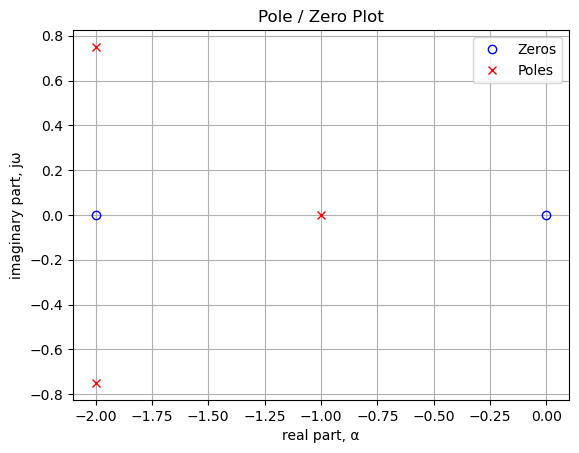

In [204]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

In [205]:
numerator

In [206]:
denominator

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [207]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of zeros: 2
-0.318 Hz
0.000 Hz


In [208]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of poles: 3
-0.318+0.119j Hz
-0.318-0.119j Hz
-0.159+0.000j Hz


### Magnitude and phase response
Plot the magnitude and phase of the filter's transfer function.

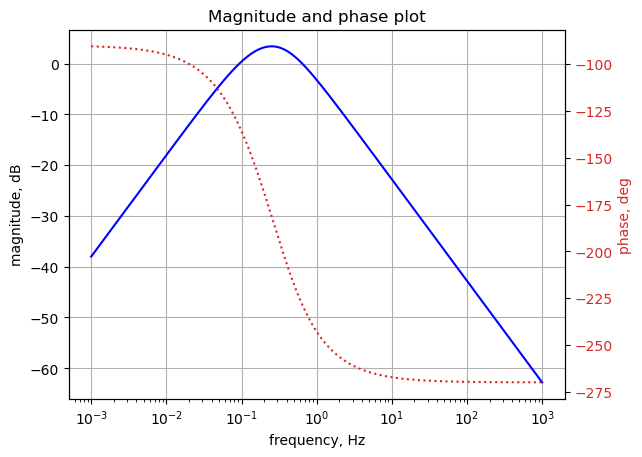

In [209]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(-3, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [210]:
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

#print('attenuation: {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[-1]))

print('Q = {:.2f}'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

max gain: 3.4 dB at 0.3 Hz
-3dB frequency: 0.6 Hz
Q = 0.50


### Step response  

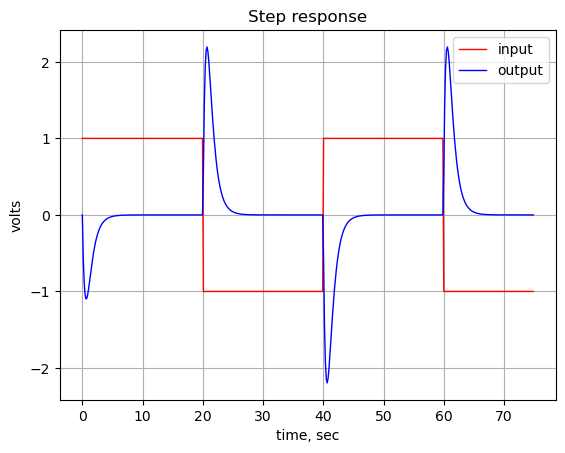

In [211]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 75.0, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Code to only solve for pole locations
Seems like for arbitrary pole locations, some cases capacitor values end up being complex. See code below to attempt to find range of pole locations where components are real.

Is there a whay to define the valid range that yeilds positive component values?


In [212]:
denominator = (s+3/4)*(s+1/4+1j*0.5)*(s+1/4-1j*0.5)
denominator

In [213]:
denominator_poly = expand(denominator)
denominator_poly

In [214]:
c3 = denominator_poly.coeff(s**3)
c2 = denominator_poly.coeff(s**2)
c1 = denominator_poly.coeff(s**1)
c0 = denominator_poly - c1*s*1 - c2*s**2 - c3*s**3

In [215]:
c1

In [216]:
a3

In [217]:
a2

In [218]:
a1

In [219]:
a0

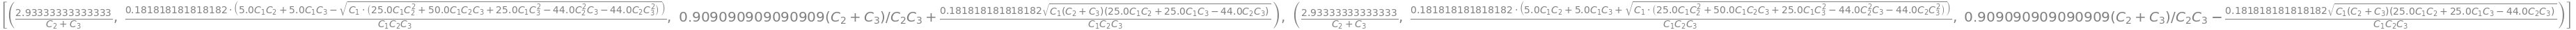

In [220]:
values = solve((a3-c3/c0,a2-c2/c0,a1-c1/c0),(R1,R2,R3))
values

Pick the values for C1, C2, C3

In [221]:
C1_value = 1
C2_value = 2
C3_value = .3

In [222]:
R1_solution = values[0][0].subs({C1:C1_value,C2:C2_value,C3:C3_value})
R1_solution

In [223]:
R2_solution = values[0][1].subs({C1:C1_value,C2:C2_value,C3:C3_value})
R2_solution

In [224]:
R3_solution = values[0][2].subs({C1:C1_value,C2:C2_value,C3:C3_value})
R3_solution

Put the values calculated above back into the net list

In [225]:
example_net_list = '''
* Twin-T-variations.asc
R1 3 1 1
R2 4 5 1
R3 2 5 1
C1 5 1 1
C2 4 3 1
C3 2 3 1
V1 1 0 1
O1 4 0 2
.backanno
.end
'''

## Generate network equations 
Call smna() to generate the network equations.

In [226]:
report, network_df, df2, A, X, Z = SymMNA.smna(example_net_list)

Generate markdown text to display the network equations.

As a test the code is hidden in the output. echo is false for this code cell

In [227]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))

Markdown(temp)

<p>$0 = - C_{1} s v_{5} + I_{V1} + v_{1} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{1}}$</p><p>$0 = - C_{3} s v_{3} + I_{O1} + v_{2} \left(C_{3} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}}$</p><p>$0 = - C_{2} s v_{4} - C_{3} s v_{2} + v_{3} \left(C_{2} s + C_{3} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$</p><p>$0 = - C_{2} s v_{3} + v_{4} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{5}}{R_{2}}$</p><p>$0 = - C_{1} s v_{1} + v_{5} \left(C_{1} s + \frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{3}} - \frac{v_{4}}{R_{2}}$</p><p>$V_{1} = v_{1}$</p><p>$0 = v_{4}$</p>

Switching the position of the equal sign.

Turn the free symbols into SymPy variables and build a dictionary of element values.

In [228]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

## Solve the Network Equations

## Numerical Analysis
Substitue the element values from the net list into the equations and solve for unknown node voltages and currents.

Element values used are the ones shown on Figure 1.

The function [round_expr()](https://stackoverflow.com/questions/48491577/printing-the-output-rounded-to-3-decimals-in-sympy) (from stackoverflow) is used to display fewer digits.

In [229]:
element_values[R1] = R1_solution
element_values[R2] = R2_solution
element_values[R3] = R3_solution
element_values[C1] = C1_value
element_values[C2] = C2_value
element_values[C3] = C3_value

In [230]:
for k,v in element_values.items():
    print(k, v)

V1 1.0
R1 1.27536231884058
R2 0.921957268547409
R3 6.04773970114956
C1 1
C2 2
C3 0.3
O1 nan


In [231]:
equ_N = NE_sym.subs(element_values)

# display the equations
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(round_expr(equ_N.lhs[i],9)))

Markdown(temp)

<p>$0 = I_{V1} - s v_{5} + v_{1} \left(s + 0.784090909\right) - 0.784090909 v_{3}$</p><p>$0 = I_{O1} - 0.3 s v_{3} + v_{2} \cdot \left(0.3 s + 0.165351032\right) - 0.165351032 v_{5}$</p><p>$0 = - 0.3 s v_{2} - 2 s v_{4} - 0.784090909 v_{1} + v_{3} \cdot \left(2.3 s + 0.784090909\right)$</p><p>$0 = - 2 s v_{3} + v_{4} \cdot \left(2 s + 1.084648968\right) - 1.084648968 v_{5}$</p><p>$0 = - s v_{1} - 0.165351032 v_{2} - 1.084648968 v_{4} + v_{5} \left(s + 1.25\right)$</p><p>$1.0 = v_{1}$</p><p>$0 = v_{4}$</p>

### Solve
Solve for voltages and currents in terms of Laplace variable s.

In [232]:
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{- 1.78766475575864 \cdot 10^{31} s^{2} - 1.23670389400863 \cdot 10^{31} s}{2.64 \cdot 10^{30} s^{3} + 3.3 \cdot 10^{30} s^{2} + 1.81499999999999 \cdot 10^{30} s + 6.18749999999997 \cdot 10^{29}}$</p><p>$v_{3} = \frac{1.87499999999999 \cdot 10^{28} - 4.3385958725638 \cdot 10^{28} s^{2}}{8.0 \cdot 10^{28} s^{3} + 1.0 \cdot 10^{29} s^{2} + 5.49999999999997 \cdot 10^{28} s + 1.87499999999999 \cdot 10^{28}}$</p><p>$v_{4} = 0.0$</p><p>$v_{5} = \frac{8.0 \cdot 10^{28} s^{3} - 3.45733975705278 \cdot 10^{28} s}{8.0 \cdot 10^{28} s^{3} + 1.0 \cdot 10^{29} s^{2} + 5.49999999999997 \cdot 10^{28} s + 1.87499999999999 \cdot 10^{28}}$</p>

### Find the network transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [233]:
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{- 1.78766475575864 \cdot 10^{31} s^{2} - 1.23670389400863 \cdot 10^{31} s}{2.64 \cdot 10^{30} s^{3} + 3.3 \cdot 10^{30} s^{2} + 1.81499999999999 \cdot 10^{30} s + 6.18749999999997 \cdot 10^{29}}$

In [234]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [235]:
sys_tf = signal.TransferFunction(a,b)

### Pole zero plot
The poles and zeros of the transfer function can easly be obtained with the following code:

In [236]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

The poles and zeros of the transfer function are plotted.

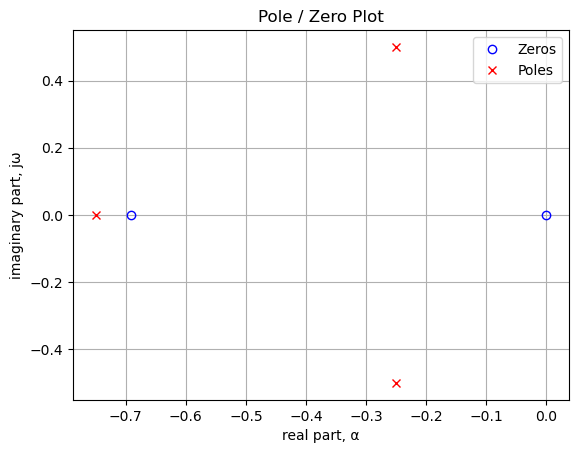

In [237]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

In [238]:
numerator

In [239]:
denominator

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [240]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of zeros: 2
-0.110 Hz
0.000 Hz


In [241]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.3f} Hz'.format(i/(2*np.pi)))

number of poles: 3
-0.119+0.000j Hz
-0.040+0.080j Hz
-0.040-0.080j Hz


### Magnitude and phase response
Plot the magnitude and phase of the filter's transfer function.

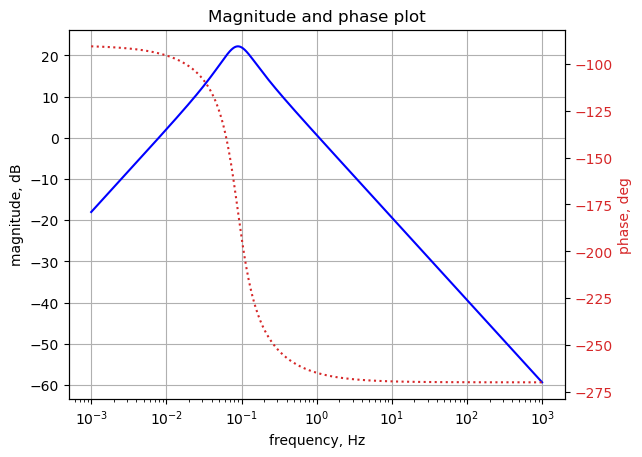

In [242]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(-3, 3, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [243]:
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

#print('attenuation: {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[-1]))

print('Q = {:.2f}'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

max gain: 22.2 dB at 0.1 Hz
-3dB frequency: 0.1 Hz
Q = 1.14


### Step response  

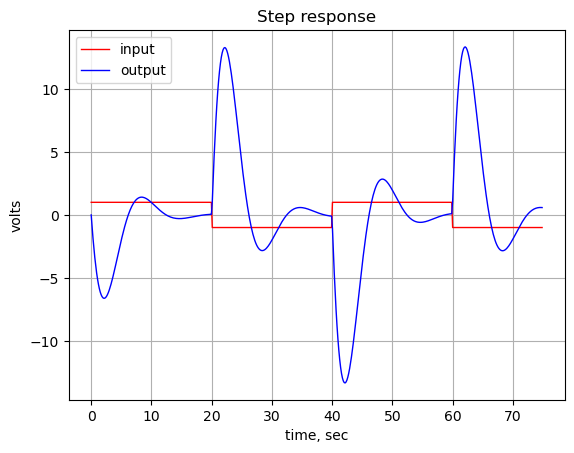

In [244]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 75.0, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*0.025*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, sec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

# Code to look for poles that produce real valued components

## 1st try

### Vieta's Equivalents

https://en.wikipedia.org/wiki/Vieta%27s_formulas

In [245]:
p, q, r = symbols('p q r')

In [246]:
(s-p)*(s-q)*(s-r)

In [247]:
expand((s-p)*(s-q)*(s-r),s)

In [248]:
str(expand((s-p)*(s-q)*(s-r),s))

'-p*q*r + p*q*s + p*r*s - p*s**2 + q*r*s - q*s**2 - r*s**2 + s**3'

In [249]:
collect(-p*q*r + p*q*s + p*r*s - p*s**2 + q*r*s - q*s**2 - r*s**2 + s**3, s)

In [250]:
H_sym_denom

In [251]:
a3

In [252]:
factor(a3*s**3+a2*s**2+a1*s+1)

In [253]:
s*(a3*s**2+a2*s+a1)+1

In [254]:
factor(s*(a3*s**2+a2*s+a1)+1)

In [255]:
expand(s*(a3*s**2+a2*s+a1)+1)

In [256]:
factor(𝑎2*𝑠**2+𝑎3*𝑠**3)

In [257]:
collect(a3*s**3+a2*s**2+a1*s+1, a2)

In [258]:
H_sym_denom

In [259]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

## second try

what should the signs of the poles be?

poles should be numerically positive and the coefficients should all be positive.

$\large{\color {red} {\text{The code in thi section seems to work}}}$  


In [260]:
p1, p2, p3 = symbols('p1 p2 p3') # system poles

In [261]:
(s+p1)*(s+p2)*(s+p3)

In [262]:
d_equ = expand((s+p1)*(s+p2)*(s+p3)).collect(s)
d_equ

In [263]:
d3 = d_equ.coeff(s**3)
d2 = d_equ.coeff(s**2)
d1 = d_equ.coeff(s**1)
d0 = d_equ - d1*s*1 - d2*s**2 - d3*s**3
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=1$</p><p>$d_2=p_{1} + p_{2} + p_{3}$</p><p>    $d_1=p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}$</p><p>$d_0=p_{1} p_{2} p_{3}$</p>

put in conanical form

In [264]:
d3=d3/d0
d2=d2/d0
d1=d1/d0
d0=d0/d0
Markdown('<p>$d_3={:s}$</p><p>$d_2={:s}$</p><p>\
    $d_1={:s}$</p><p>$d_0={:s}$</p>'.format(latex(d3),
    latex(d2),latex(d1),latex(d0)))

<p>$d_3=\frac{1}{p_{1} p_{2} p_{3}}$</p><p>$d_2=\frac{p_{1} + p_{2} + p_{3}}{p_{1} p_{2} p_{3}}$</p><p>    $d_1=\frac{p_{1} p_{2} + p_{1} p_{3} + p_{2} p_{3}}{p_{1} p_{2} p_{3}}$</p><p>$d_0=1$</p>

In [265]:
a3 = H_sym_denom.coeff(s**3)
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = H_sym_denom - a1*s*1 - a2*s**2 - a3*s**3
Markdown('<p>$a_3={:s}$</p><p>$a_2={:s}$</p><p>\
    $a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a3),
    latex(a2),latex(a1),latex(a0)))

<p>$a_3=C_{1} C_{2} C_{3} R_{1} R_{2} R_{3}$</p><p>$a_2=C_{2} C_{3} R_{1} R_{2} + C_{2} C_{3} R_{1} R_{3}$</p><p>    $a_1=C_{2} R_{1} + C_{3} R_{1}$</p><p>$a_0=1$</p>

observations

poles can be real or one set of complex conjugets


c2 > C1 > C3   not always

In [266]:
sub_values = {C1:0.7, C2:0.2, C3:0.3, p1:3, p2:3, p3:3}

sol_values = solve(((d3-a3).subs(sub_values), (d2-a2).subs(sub_values), (d1-a1).subs(sub_values)),(R1,R2,R3))
sol_values

In [267]:
R1_value = sol_values[0][0]
R2_value = sol_values[0][1]
R3_value = sol_values[0][2]

In [268]:
temp = H_sym_denom.subs(sub_values).subs({R1:R1_value, R2:R2_value, R3:R3_value})
#temp = H_sym_denom.subs({R1:R1_value,R2:R2_value,R3:R3_value})
e3 = temp.coeff(s**3)

In [269]:
temp/e3

In [270]:
solve(temp,s)

checking the results

In [271]:
d_equ

In [272]:
d_equ.subs(sub_values).expand().collect(s)

In [273]:
solve(d_equ.subs(sub_values),s)

checking the other coefficients

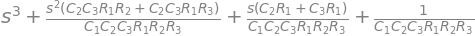

In [274]:
a3/a3*s**3+a2/a3*s**2+a1/a3*s+a0/a3

In [275]:
(a3/a3*s**3+a2/a3*s**2+a1/a3*s+a0/a3).subs(sub_values).subs({R1:R1_value,R2:R2_value,R3:R3_value})

## Looking at the numerator

In [276]:
z1, z2 = symbols('z1 z2') # system zeros

In [277]:
z2*s*(s+z1)

In [278]:
n_equ = expand(z2*s*(s+z1)).collect(s)
n_equ

In [279]:
solve(z2*s*(s+z1),s)

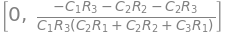

In [280]:
sym_zeros = solve(H_sym_num,s)
sym_zeros

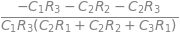

In [281]:
sym_zeros[1]

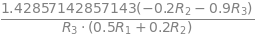

In [282]:
sym_zeros[1].subs(sub_values)

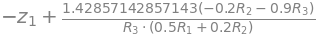

In [283]:
(sym_zeros[1]-z1).subs(sub_values)

## solving the zero along with the poles 

In [284]:
sub_values = {C1:0.3, C2:0.3, C3:0.3, p1:3, p2:3, p3:3, z1:-1.98788894932654}

sol_values = solve(((d3-a3).subs(sub_values), (d2-a2).subs(sub_values), (d1-a1).subs(sub_values), (sym_zeros[1]-z1).subs(sub_values)),(R1,R2,R3))
sol_values

Seems like we can't solve for the zero along with the poles.

Trying the zero snd two poles

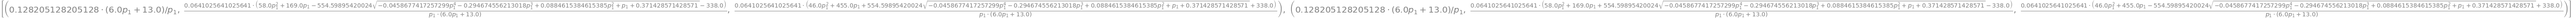

In [285]:
sub_values = {C1:0.3, C2:0.3, C3:0.3, p2:3+1j*2, p3:3-1j*2, z1:-2}

sol_values = solve(((d2-a2).subs(sub_values), (d1-a1).subs(sub_values), (sym_zeros[1]-z1).subs(sub_values)),(R1,R2,R3))
sol_values

In [286]:
p1_value = {p1:0.1}

In [287]:
(sol_values[0][0]).subs(p1_value)

In [288]:
(sol_values[0][1]).subs(p1_value)

In [289]:
(sol_values[0][2]).subs(p1_value)

can't solve for p1 when z1 is specified

In [290]:
H_sym_num

In [291]:
b0

In [292]:
b1

In [293]:
b2

In [294]:
H_sym_num.subs(sub_values).subs({R1:R1_value, R2:R2_value, R3:R3_value})

In [295]:
solve(H_sym_num.subs(sub_values).subs({R1:R1_value, R2:R2_value, R3:R3_value}),s)

In [296]:
stop

NameError: name 'stop' is not defined

# OLD code below here

### Group delay
The group delay for this path is calculated and plotted below.

In [ ]:
x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w)*1000,'-',label='group delay')

plt.xlim((10,100e3))
plt.ylim((0,4))

plt.ylabel('Group delay, msec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

### Trying to plot with three Y-axis

In [ ]:
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)
# see https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales

# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
    
ax2 = host.twinx()
ax3 = host.twinx()
    
#host.set_xlim(0, 2)
#host.set_ylim(0, 2)
#ax2.set_ylim(0, 4)
#ax3.set_ylim(1, 65)
    
host.set_xlabel('C2 values, nF')
host.set_ylabel('R2 values, k ohms')
ax2.set_ylabel('Q values')
ax3.set_ylabel('Peak, dB')
plt.title('XXX vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))

color1, color2, color3 = plt.cm.viridis([0, .5, .9])

#p1 = host.plot([0, 1, 2], [0, 1, 2],    color=color1, label="Density")
#p2 = ax2.plot( [0, 1, 2], [0, 3, 2],    color=color2, label="Temperature")
#p3 = ax3.plot( [0, 1, 2], [50, 30, 15], color=color3, label="Velocity")

p1 = host.plot(C2_plot*1e9,R2_plot/1e3,'^-', color=color1, label='R value')
p2 = ax2.plot(C2_plot*1e9,Q_plot,'o-', color=color2, label='Q')
p3 = ax3.plot(C2_plot*1e9,peak_plot,'x-', color=color3, label='peak')

host.set_xlim(0,55)
host.grid()

host.legend(handles=p1+p2+p3, loc='best')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))

# no x-ticks                 
#host.xaxis.set_ticks([])

# Alternatively (more verbose):
# host.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off)
#     labelbottom=False) # labels along the bottom edge are off
# sometimes handy:  direction='in'    

# Move "Velocity"-axis to the left
# ax3.spines['left'].set_position(('outward', 60))
# ax3.spines['left'].set_visible(True)
# ax3.spines['right'].set_visible(False)
# ax3.yaxis.set_label_position('left')
# ax3.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax3.yaxis.label.set_color(p3[0].get_color())

# For professional typesetting, e.g. LaTeX, use .pgf or .pdf
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
#plt.savefig("pyplot_multiple_y-axis.pdf", bbox_inches='tight')
# bbox_inches='tight': Try to strip excess whitespace
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.show()

Can the numerator and denominator be factored?

| dictionary assignments | Characteristic equation |
|:-----------------------|:------------------------|
| R1:R, R2:R, C1:C, C2:C | $C^{2} C_{3} R^{2} R_{3} s^{3} + s^{2} \left(C C_{3} R^{2} + C C_{3} R R_{3}\right) + s \left(C R + C_{3} R\right) + 1$ |
| R1:R, R2:R, C1:C, C3:C | $C^{2} C_{2} R^{2} R_{3} s^{3} + s^{2} \left(C C_{2} R^{2} + C C_{2} R R_{3}\right) + s \left(C R + C_{2} R\right) + 1$ |
| R1:R, R2:R, C2:C, C3:C | $C^{2} C_{1} R^{2} R_{3} s^{3} + 2 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{3}\right) + 1$ |
| R1:R, R3:R, C1:C, C2:C | $C^{2} C_{3} R^{2} R_{2} s^{3} + s^{2} \left(C C_{3} R^{2} + C C_{3} R R_{2}\right) + s \left(C R + C_{3} R\right) + 1$ |
| R1:R, R3:R, C1:C, C3:C | $C C_{2} R R_{2} s^{2} + C_{2} R s + 1$ |
| R1:R, R3:R, C2:C, C3:C | $C^{2} C_{1} R^{2} R_{2} s^{3} + 2 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{2}\right) + 1$ |
| R2:R, R3:R, C1:C, C2:C | $C^{2} C_{3} R^{2} R_{1} s^{3} + 2 C C_{3} R R_{1} s^{2} + s \left(C R_{1} + C_{3} R_{1}\right) + 1$ |
| R2:R, R3:R, C1:C, C3:C | $C^{2} C_{2} R^{2} R_{1} s^{3} + 2 C C_{2} R R_{1} s^{2} + s \left(C R_{1} + C_{2} R_{1}\right) + 1$ |
| R2:R, R3:R, C2:C, C3:C | $C^{2} C_{1} R^{2} R_{1} s^{3} + 2 C^{2} R R_{1} s^{2} + 2 C R_{1} s + 1$ |
| C1:C, C2:C, C3:C | $C^{3} R_{1} R_{2} R_{3} s^{3} + 2 C R_{1} s + s^{2} \left(C^{2} R_{1} R_{2} + C^{2} R_{1} R_{3}\right) + 1$ |
| R1:R, R2:R, C1:C, C2:C, C3:C | $C^{3} R^{2} R_{3} s^{3} + 2 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{3}\right) + 1$ |
| R1:R, R2:R, C1:C/2, C2:C, C3:C | $C^{3} R^{2} R_{3} s^{3} + 4 C R s + s^{2} \cdot \left(2 C^{2} R^{2} + 2 C^{2} R R_{3}\right) + 2$ |
| R1:R, R2:R, C1:C, C2:C/2, C3:C | $C^{3} R^{2} R_{3} s^{3} + 3 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{3}\right) + 2$ |
| R1:R, R2:R, C1:C, C2:C, C3:C/2 | $C^{3} R^{2} R_{3} s^{3} + 3 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{3}\right) + 2$ |
| R1:R, R2:R, C1:C/2, C2:C/2, C3:C | $C^{3} R^{2} R_{3} s^{3} + 6 C R s + s^{2} \cdot \left(2 C^{2} R^{2} + 2 C^{2} R R_{3}\right) + 4$ |
| R1:R, R2:R, C1:C, C2:C/2, C3:C/2 | $C^{3} R^{2} R_{3} s^{3} + 4 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{3}\right) + 4$ |
| R1:R, R2:R, C1:C/2, C2:C, C3:C/2 | $C^{3} R^{2} R_{3} s^{3} + 6 C R s + s^{2} \cdot \left(2 C^{2} R^{2} + 2 C^{2} R R_{3}\right) + 4$ |
| R1:R, R3:R, C1:C, C2:C, C3:C | $C^{2} R R_{2} s^{2} + C R s + 1$ |
| R1:R, R3:R, C1:C/2, C2:C, C3:C | $C^{3} R^{2} R_{2} s^{3} + 4 C R s + s^{2} \cdot \left(2 C^{2} R^{2} + 2 C^{2} R R_{2}\right) + 2$ |
| R1:R, R3:R, C1:C, C2:C/2, C3:C | $C^{2} R R_{2} s^{2} + C R s + 2$ |
| R1:R, R3:R, C1:C, C2:C, C3:C/2 | $C^{3} R^{2} R_{2} s^{3} + 3 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{2}\right) + 2$ |
| R1:R, R3:R, C1:C/2, C2:C/2, C3:C | $C^{3} R^{2} R_{2} s^{3} + 6 C R s + s^{2} \cdot \left(2 C^{2} R^{2} + 2 C^{2} R R_{2}\right) + 4$ |
| R1:R, R3:R, C1:C, C2:C/2, C3:C/2 | $C^{3} R^{2} R_{2} s^{3} + 4 C R s + s^{2} \left(C^{2} R^{2} + C^{2} R R_{2}\right) + 4$ |
| R1:R, R3:R, C1:C/2, C2:C, C3:C/2 | $C^{2} R R_{2} s^{2} + 2 C R s + 2$ |
| R2:R, R3:R, C1:C, C2:C, C3:C | $C^{3} R^{2} R_{1} s^{3} + 2 C^{2} R R_{1} s^{2} + 2 C R_{1} s + 1$ |
| R2:R, R3:R, C1:C/2, C2:C, C3:C | $C^{3} R^{2} R_{1} s^{3} + 4 C^{2} R R_{1} s^{2} + 4 C R_{1} s + 2$ |
| R2:R, R3:R, C1:C, C2:C/2, C3:C | $C^{3} R^{2} R_{1} s^{3} + 2 C^{2} R R_{1} s^{2} + 3 C R_{1} s + 2$ |
| R2:R, R3:R, C1:C, C2:C, C3:C/2 | $C^{3} R^{2} R_{1} s^{3} + 2 C^{2} R R_{1} s^{2} + 3 C R_{1} s + 2$ |
| R2:R, R3:R, C1:C/2, C2:C/2, C3:C | $C^{3} R^{2} R_{1} s^{3} + 4 C^{2} R R_{1} s^{2} + 6 C R_{1} s + 4$ |
| R2:R, R3:R, C1:C, C2:C/2, C3:C/2 | $C^{3} R^{2} R_{1} s^{3} + 2 C^{2} R R_{1} s^{2} + 4 C R_{1} s + 4$ |
| R2:R, R3:R, C1:C/2, C2:C, C3:C/2 | $C^{3} R^{2} R_{1} s^{3} + 4 C^{2} R R_{1} s^{2} + 6 C R_{1} s + 4$ |
| R1:R, R2:R, R3:R, C1:C, C2:C, C3:C | $C^{2} R^{2} s^{2} + C R s + 1$ |
| R1:R, R2:R/2, R3:R, C1:C, C2:C/2, C3:C | $C^{2} R^{2} s^{2} + 2 C R s + 4$ |
| <img width=300/> | <img width=400/> |
| <img width=300/> | <img width=400/> |

## Plots solving for C2

In [ ]:
#R2_plot = np.linspace(5,250,20)*1e3
R2_min_value = 5 # value in k okms 
R2_max_value = 50 # value in k okms 

R2_plot = np.logspace(np.log10(R2_min_value), np.log10(R2_max_value), 20, endpoint=True)*1e3
C2_plot = np.zeros(len(R2_plot))
freq = 1 # kHz
C_value = 10e-9
R_value = 10e3
for i in range(len(R2_plot)):
    C2_plot[i] = solve(omega_sym.subs({R:R_value, R2:R2_plot[i], C:C_value})-2*np.pi*freq*1e3,C2)[0]
    
plt.plot(R2_plot/1e3,C2_plot*1e9)
#plt.semilogx(R2_plot/1e3,C2_plot*1e9)

plt.xlabel('R2 values, k ohms')
plt.ylabel('C2 values, nF')
plt.title('C2 vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

In [ ]:
Q_sym

In [ ]:
Q_plot = np.zeros(len(R2_plot))

for i in range(len(R2_plot)):
    Q_plot[i] = Q_sym.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i]})
    
plt.plot(R2_plot/1e3,Q_plot)
#plt.semilogx(R2_plot/1e3,C2_plot*1e9)

plt.xlabel('R2 values, k ohms')
plt.ylabel('Q values')
plt.title('C2 vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

In [ ]:
H_sym_reduced_1

In [ ]:
20*np.log10(float(abs(H_sym_reduced_1.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:np.pi*freq*1e3}))))

In [ ]:
((float(H_sym_reduced_1.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:np.pi*freq*1e3}))))

In [ ]:
peak_plot = np.zeros(len(R2_plot))

for i in range(len(R2_plot)):
    peak_plot[i] = 20*np.log10(float(abs(H_sym_reduced_1.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:1j*2*np.pi*freq*1e3}))))
    #peak_plot[i] = ((float(H_sym_reduced_1.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i], s:2*np.pi*freq*1e3}))))
    
plt.plot(R2_plot/1e3,peak_plot)
#plt.semilogx(R2_plot/1e3,C2_plot*1e9)

plt.xlabel('R2 values, k ohms')
plt.ylabel('Peak, dB')
plt.title('Peak vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

In [ ]:
R_value

In [ ]:
C_value

In [ ]:
freq

In [ ]:
R2_value = 10e3

In [ ]:
C2_value = solve(omega_sym.subs({R:R_value, R2:R2_value, C:C_value})-2*np.pi*freq*1e3,C2)[0]
C2_value

In [ ]:
num, denom = fraction(H_sym_reduced_1.subs({R:R_value, R2:R2_value, C:C_value, C2:C2_value}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

x = np.logspace(2, 4, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [ ]:
C_value

In [ ]:
R_value

In [ ]:
Rn

In [ ]:
R2n

In [ ]:
C2n

## Case 2: ```R = R1 = R2 = R3``` and ```C = C1 = C2 = C3```

In [ ]:
C, R = symbols('C R')

In [ ]:
equ_reduced_2 = NE_sym.subs({R1:R, R2:R, R3:R, C1:C, C2:C, C3:C})

In [ ]:
#| echo: true

# display the equations
temp = ''
for i in range(shape(equ_reduced_2.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_reduced_2.rhs[i]),latex(equ_reduced_2.lhs[i]))
Markdown(temp)

In [ ]:
U_sym_reduced_2 = solve(equ_reduced_2,X)

temp = ''
for i in U_sym_reduced_2.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_2[i]))

Markdown(temp)

### Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [ ]:
H_sym_reduced_2 = cancel(U_sym_reduced_2[v2]/U_sym_reduced_2[v1],s)
Markdown('${:s}$'.format(latex(H_sym_reduced_2)))

In [ ]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced_2,s) #returns numerator and denominator

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_num)))

### Characteristic equation

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_denom)))

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$



In [ ]:
a = H_sym_denom.coeff(s**2)
Markdown('$a={:s}$'.format(latex(a)))

In [ ]:
b = H_sym_denom.coeff(s)
Markdown('$b={:s}$'.format(latex(b)))

To find the c coefficient just subract off $bs$ and $cs^2$ from the quadratic equation.

In [ ]:
c = H_sym_denom - b*s - a*s**2
Markdown('$c={:s}$'.format(latex(c)))

### Natural frequency and Q factor
The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$


In [ ]:
omega_sym = sqrt(c/a)
Markdown('$\omega_n={:s}$'.format(latex(omega_sym)))

In [ ]:
Q_sym = (a/b)*omega_sym
Markdown('$Q={:s}$'.format(latex(Q_sym)))

Got and error: ZeroDivisionError: matrix is numerically singular

In [ ]:
#Rn, Cn = nsolve((omega_sym - 2*np.pi*1e3, Q_sym - 0.5),(R,C),(5e3, 1e-10))

solving for only omega

In [ ]:
Rn = nsolve((omega_sym.subs({C:1e-08}) - 2*np.pi*1e3),R,5e3)

In [ ]:
Rn

In [ ]:
Q_sym.subs({R:Rn,C:1e-08})

In [ ]:
num, denom = fraction(H_sym_reduced_2.subs({R:Rn,C:1e-08}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(2, 4, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

## Case 3: ```R = ``` and ```C = ```

Case 1: ```equ_reduced_1 = NE_sym.subs({R1:R, R3:R, C1:C, C3:C})```

In [ ]:
C, R = symbols('C R')

In [ ]:
equ_reduced_3 = NE_sym.subs({R1:R, R3:R, C1:C, C3:C})

In [ ]:
#| echo: true

# display the equations
temp = ''
for i in range(shape(equ_reduced_3.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_reduced_3.rhs[i]),latex(equ_reduced_3.lhs[i]))
Markdown(temp)

In [ ]:
U_sym_reduced_3 = solve(equ_reduced_3,X)

temp = ''
for i in U_sym_reduced_3.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_3[i]))

Markdown(temp)

### Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [ ]:
H_sym_reduced_3 = cancel(U_sym_reduced_3[v2]/U_sym_reduced_3[v1],s)
Markdown('${:s}$'.format(latex(H_sym_reduced_3)))

In [ ]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced_3,s) #returns numerator and denominator

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_num)))

### Characteristic equation

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_denom)))

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$



In [ ]:
a = H_sym_denom.coeff(s**2)
Markdown('$a={:s}$'.format(latex(a)))

In [ ]:
b = H_sym_denom.coeff(s)
Markdown('$b={:s}$'.format(latex(b)))

To find the c coefficient just subract off $bs$ and $cs^2$ from the quadratic equation.

In [ ]:
c = H_sym_denom - b*s - a*s**2
Markdown('$c={:s}$'.format(latex(c)))

### Natural frequency and Q factor
The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$


In [ ]:
omega_sym = sqrt(c/a)
Markdown('$\omega_n={:s}$'.format(latex(omega_sym)))

In [ ]:
Q_sym = (a/b)*omega_sym
Markdown('$Q={:s}$'.format(latex(Q_sym)))

In [ ]:
H_sym_reduced_1

In [ ]:
H_sym_reduced_1.subs({C:1e-08, s:1j*2*np.pi*1e3})

In [ ]:
abs(H_sym_reduced_1.subs({C:1e-08, s:1j*2*np.pi*1e3}))-3

Need to play with the initaial vaiues to get nsolve to converge to a solution.

In [ ]:
Rn, R2n, C2n = nsolve((omega_sym.subs({C: 1e-08})-2*np.pi*1e3, Q_sym.subs({C: 1e-08})-0.3, H_sym_reduced_1.subs({C:1e-08, s:1j*2*np.pi*1e3})+2),(R,R2,C2),(20e3, 5e3, 1e-10))

In [ ]:
Rn

In [ ]:
abs(Rn)

In [ ]:
R2n

In [ ]:
C2n

In [ ]:
H_sym_reduced_1.subs({R:abs(Rn),R2:abs(R2n),C2:abs(C2n), C:1e-08})

In [ ]:
num, denom = fraction(H_sym_reduced_1.subs({R:abs(Rn),R2:abs(R2n),C2:abs(C2n),C:1e-08}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(2, 4, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [ ]:
H_sym_num

In [ ]:
Markdown('${:s}$'.format(latex(num_root_sym[1])))

Replace reference designators with a2, a1 and a0.  Find factors

In [ ]:
a2, a1, a0 = symbols('a2 a1 a0')

In [ ]:
s**3+a2*s**2+a1*s+a0

### Vieta's Equivalents

https://en.wikipedia.org/wiki/Vieta%27s_formulas

In [ ]:
p, q, r = symbols('p q r')

In [ ]:
(s-p)*(s-q)*(s-r)

In [ ]:
expand((s-p)*(s-q)*(s-r),s)

In [ ]:
str(expand((s-p)*(s-q)*(s-r),s))

In [ ]:
collect(-p*q*r + p*q*s + p*r*s - p*s**2 + q*r*s - q*s**2 - r*s**2 + s**3, s)

In [ ]:
factor(a3*s**3+a2*s**2+a1*s+1)

In [ ]:
s*(a3*s**2+a2*s+a1)+1

In [ ]:
factor(s*(a3*s**2+a2*s+a1)+1)

In [ ]:
expand(s*(a3*s**2+a2*s+a1)+1)

In [ ]:
factor(𝑎2*𝑠**2+𝑎3*𝑠**3)

In [ ]:
collect(a3*s**3+a2*s**2+a1*s+1, a2)

### othe calculations

In [ ]:
H_sym

Let C = C1 = C3, C2 = C/2

In [ ]:
H_sym.subs({R1:R, R3:R, C1:C, C2:1e-8,C3:C})

In [ ]:
H_sym_reduced.subs({R:Rn,R2:R2n,C: 1e-08})

In [ ]:
H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:I*2*np.pi*1e3})

In [ ]:
H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:2*np.pi*1e3})

In [ ]:
H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:1j*2*np.pi*1e3})

In [ ]:
gain = abs(H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:1j*2*np.pi*1e3}))

In [ ]:
type(gain)

In [ ]:
20*np.log10(float(gain))

In [ ]:
1j

In [ ]:
sqrt(1j)

In [ ]:
p1, p2, p3 = symbols('p1 p2 p3') # system poles

In [ ]:
(s+p1)*(s+p2)*(s+p3)

In [ ]:
d_equ = expand((s-p1)*(s-p2)*(s-p3)).collect(s)
d_equ

In [ ]:
d3 = d_equ.coeff(s**3)
d2 = d_equ.coeff(s**2)
d1 = d_equ.coeff(s**1)
d0 = d_equ - d1*s*1 - d2*s**2 - d3*s**3

In [ ]:
d3

In [ ]:
d2

In [ ]:
d1

In [ ]:
d0

$a_3s^3+a_2s^2+a_1s+a_0$

In [ ]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

In [ ]:
a3

In [ ]:
d3

In [ ]:
d3-a3

In [ ]:
d2-a2

In [ ]:
d1-a1

In [ ]:
d0 - a0

Trying the code below in Colab.
In Colab no solution after 1 hr 51 minutes. Letting in run.

Might try with a 2nd order problem.

### Trying a 2nd order problem

In [ ]:
(s+p1)*(s+p2)

In [ ]:
d_equ = expand((s-p1)*(s-p2)).collect(s)
d_equ

In [ ]:
d2 = d_equ.coeff(s**2)
d1 = d_equ.coeff(s**1)
d0 = d_equ - d1*s*1 - d2*s**2

# Start of Section to remove
Remove this section.

## Case: R1:R, R2:R, R3:R, C1:C, C2:C, C3:C
$\large{\color {red} {\text{before doing additional cases, verify $\omega_n$ and Q calculations}}}$  

## Case: R1:R, R3:R, C1:C, C2:C/2, C3:C

## Example Case

$\large{\color {red} {\text{need section heading and outline}}}$  

Plot various 2nd order vs R2 and C2. 

Setting other combinations of Rs and Cs equal produce the following charateristic equations. 

explore working with 3rd order equations directly, look at filter hand book, design with eliptic filters


cases:

- R1:R, R2:R, R3:R, C1:C, C2:C, C3:C
- R1:R, R3:R, C1:C, C2:C/2, C3:C
- 

### Design equations

- given a value for C, specify $\omega_n$ and Q 
  - ```C = C1 = C3``` and ```C2 = C/2```
- solve for ```R = R1 = R3``` and ```R2```.

Solve a nonlinear equation system numerically:

In [ ]:
omega_sym

In [ ]:
omega_sym.subs({C: 1e-08})

In [ ]:
Q_sym

In [ ]:
Rn, R2n = nsolve((omega_sym.subs({C: 1e-08,C2:1e-8/2})-2*np.pi*1e3, Q_sym.subs({C: 1e-08,C2:1e-8/2})-0.5),(R,R2),(20e3, 80e3))

In [ ]:
Rn

In [ ]:
R2n

In [ ]:
H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:1j*2*np.pi*1e3})

In [ ]:
abs(H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, s:1j*2*np.pi*1e3}))

In [ ]:
float(abs(H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, C2:1e-8/2,s:1j*2*np.pi*1e3})))

In [ ]:
20*np.log10(float(abs(H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08, C2:1e-8/2, s:1j*2*np.pi*1e3}))))

In [ ]:
num, denom = fraction(H_sym_reduced.subs({R:Rn, R2:R2n, C:1e-08,C2:1e-8/2})) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(2, 4, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [ ]:
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

print('attenuation: {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[-1]))

print('Q = {:.2f}'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

In [ ]:
# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

Use the SciPy function [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html) is used to represent the system as the continuous-time transfer function. 

In [ ]:
sys_tf = signal.TransferFunction(a,b)

In [ ]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, .06, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*25*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Sample case, see case 1

### Expanding the above to solve for gain, $\omega$ and Q
The circuit has three resistors and three capacitors. 
The transfer function simplifies under the case of R = R1 = R3 and C = C1 = C3

Call the network equations and solution ```_reduced_A```, need a better label

Try different variations on the simplification. 

Try changing C and R and fixing R2, C2 

In [ ]:
C, R = symbols('C R')

### Reduce the resistor and capactor count by 1

Reduce cap count by 1

In [ ]:
equ_reduced_A = NE_sym.subs({C1:C, C3:C})

Reduce cap count by 2

In [ ]:
equ_reduced_A = NE_sym.subs({C1:C, C2:C, C3:C})

The two above produce a third order demoninator

Seems like it's necessary to reduce the resistor count also, the following produces a 2nd order

In [ ]:
equ_reduced_A = NE_sym.subs({R1:R, R3:R, C1:C, C2:C, C3:C})

In [ ]:
equ_reduced_A = NE_sym.subs({R1:R, R2:R, R3:R, C1:C, C2:C, C3:C})

### Case 1: ```R = R1 = R3``` and ```C = C1 = C3```, pick C, $\omega_n$, Q and peak gain, solve for R, R2, C2

Film caps range 33pf to 10uF. Tollerances of 1% has less values,  5% tol has a wide range of values available.

Rebuild the network equations: 

In [ ]:
# Calculate the transfer function
C, R = symbols('C R')
equ_reduced_1 = NE_sym.subs({ R1:R, R3:R, C1:C, C3:C})

echo is true for this code cell 

In [ ]:
#| echo: true

# display the equations
temp = ''
for i in range(shape(equ_reduced_1.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_reduced_1.rhs[i]),latex(equ_reduced_1.lhs[i]))
Markdown(temp)

In [ ]:
U_sym_reduced_1 = solve(equ_reduced_1,X)

temp = ''
for i in U_sym_reduced_1.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_1[i]))

Markdown(temp)

Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [ ]:
H_sym_reduced_1 = cancel(U_sym_reduced_1[v2]/U_sym_reduced_1[v1],s)
Markdown('${:s}$'.format(latex(H_sym_reduced_1)))

In [ ]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced_1,s) #returns numerator and denominator

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_num)))

### Characteristic equation

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_denom)))

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$



In [ ]:
a = H_sym_denom.coeff(s**2)
Markdown('$a={:s}$'.format(latex(a)))

In [ ]:
b = H_sym_denom.coeff(s)
Markdown('$b={:s}$'.format(latex(b)))

To find the c coefficient just subract off $bs$ and $cs^2$ from the quadratic equation.

In [ ]:
c = H_sym_denom - b*s - a*s**2
Markdown('$c={:s}$'.format(latex(c)))

### Natural frequency and Q factor
The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$


In [ ]:
omega_sym = sqrt(c/a)
Markdown('$\omega_n={:s}$'.format(latex(omega_sym)))

In [ ]:
Q_sym = (a/b)*omega_sym
Markdown('$Q={:s}$'.format(latex(Q_sym)))

Need to play with the initaial vaiues to get nsolve to converge to a solution.

Research film caps and find typical values and tolerances.

In [ ]:
Rn, R2n, C2n = nsolve((omega_sym.subs({C: 1e-08})-2*np.pi*1e3, Q_sym.subs({C: 1e-08})-0.3, H_sym_reduced_1.subs({C:1e-08, s:1j*2*np.pi*1e3})+2),(R,R2,C2),(20e3, 5e3, 1e-10))

In [ ]:
Rn

In [ ]:
abs(Rn)

In [ ]:
R2n

In [ ]:
C2n

In [ ]:
20*np.log10(float(abs(H_sym_reduced_1.subs({R:abs(Rn),R2:abs(R2n),C2:abs(C2n), C:1e-08,s:1j*2*np.pi*1e3}))))

In [ ]:
num, denom = fraction(H_sym_reduced_1.subs({R:abs(Rn),R2:abs(R2n),C2:abs(C2n),C:1e-08}))

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b) # system for circuit 1

x = np.logspace(2, 4, 1000, endpoint=True)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # magnitude plot

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Magnitude and phase plot')
plt.show()

In [ ]:
max_gain = mag.max()
max_gain_arg = mag.argmax()
max_gain_freq = w[max_gain_arg]/(2*np.pi)
print('max gain: {:.1f} dB at {:.1f} Hz'.format(max_gain, max_gain_freq))

gain_3dB_arg_offset = np.where(mag[max_gain_arg:] < max_gain - 3)[0][0]
freq_3dB = w[max_gain_arg+gain_3dB_arg_offset]/(2*np.pi)
print('-3dB frequency: {:.1f} Hz'.format(freq_3dB))

print('attenuation: {:.1f} dB per decade'.format(mag[max_gain_arg] - mag[-1]))

print('Q = {:.2f}'.format(w[mag.argmax()]/(w[np.where(mag > (mag.max()-3))[0][-1]] - w[np.where(mag > (mag.max()-3))[0][0]])))

In [ ]:
#| echo: false
#| fig-cap: fig cap

E6_cap_nF_list = np.array([2.2, 3.3, 4.7, 6.8, 10, 15, 22, 33, 47])*1e-9

C2_plot = E6_cap_nF_list

R2_plot = np.zeros(len(C2_plot))

freq = 1 # kHz
C_value = 10e-9
R_value = 10e3

# solve for R2 for each C2 in the capacitor list
for i in range(len(C2_plot)):
    R2_plot[i] = solve(omega_sym.subs({R:R_value, C2:C2_plot[i], C:C_value})-2*np.pi*freq*1e3,R2)[0]
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,R2_plot[i]/1e3), xytext=(5,2), textcoords='offset points')

plt.plot(C2_plot*1e9,R2_plot/1e3,'x-')
#plt.semilogx(R2_plot/1e3,C2_plot*1e9)
plt.xlim((0,55))

plt.ylabel('R2 values, k ohms')
plt.xlabel('C2 values, nF')
plt.title('C2 vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

In [ ]:
R2_plot

In [ ]:
C2_plot

In [ ]:
Q_sym

In [ ]:
#| echo: false
#| fig-cap: fig cap

Q_plot = np.zeros(len(C2_plot))

for i in range(len(C2_plot)):
    Q_plot[i] = Q_sym.subs({R:R_value, R2:R2_plot[i], C:C_value, C2:C2_plot[i]})
    plt.annotate('{:.1f}nF'.format(C2_plot[i]*1e9), xy=(C2_plot[i]*1e9,Q_plot[i]), xytext=(5,2), textcoords='offset points')

plt.plot(C2_plot*1e9,Q_plot,'x-')
#plt.semilogx(R2_plot/1e3,C2_plot*1e9)
plt.xlim((0,55))

plt.xlabel('C2 values, nF')
plt.ylabel('Q values')
plt.title('C2 vs R2 for {:.0f} kHz, R={:.0f}k, C={:,.0f} pF'.format(freq,R_value/1e3,C_value*1e12))
plt.grid()
plt.show()

In [ ]:
Q_plot

In [ ]:
# Calculate the transfer function
C, R = symbols('C R')
equ_reduced_3 = NE_sym.subs({ R1:R, R3:R, C1:C, C3:C})

In [ ]:
#| echo: true

# display the equations
temp = ''
for i in range(shape(equ_reduced_3.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_reduced_3.rhs[i]),latex(equ_reduced_3.lhs[i]))
Markdown(temp)

In [ ]:
U_sym_reduced_3 = solve(equ_reduced_3,X)

temp = ''
for i in U_sym_reduced_3.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_3[i]))

Markdown(temp)

Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [ ]:
H_sym_reduced_3 = cancel(U_sym_reduced_3[v2]/U_sym_reduced_3[v1],s)
Markdown('${:s}$'.format(latex(H_sym_reduced_3)))

In [ ]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced_3,s) #returns numerator and denominator

Characteristic equation for table above

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_denom)))

In [ ]:
str(H_sym_denom)

In [ ]:
'${:s}$'.format(latex(H_sym_denom))

In [ ]:
# Calculate the transfer function
C, R = symbols('C R')
equ_reduced_1 = NE_sym.subs({R1:R, R3:R, C1:C, C3:C})

echo is true for this code cell

In [ ]:
#| echo: true

# display the equations
temp = ''
for i in range(shape(equ_reduced_1.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_reduced_1.rhs[i]),latex(equ_reduced_1.lhs[i]))
Markdown(temp)

In [ ]:
U_sym_reduced_1 = solve(equ_reduced_1,X)

temp = ''
for i in U_sym_reduced_1.keys():
    if str(i)[0] == 'v': # only display the node voltages
        temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U_sym_reduced_1[i]))

Markdown(temp)

Find the transfer function $H(s)=\frac {v_2(s)}{v_1(s)}$

In [ ]:
H_sym_reduced_1 = cancel(U_sym_reduced_1[v2]/U_sym_reduced_1[v1],s)
Markdown('${:s}$'.format(latex(H_sym_reduced_1)))

In [ ]:
H_sym_num, H_sym_denom = fraction(H_sym_reduced_1,s) #returns numerator and denominator

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_num)))

### Characteristic equation

In [ ]:
Markdown('${:s}$'.format(latex(H_sym_denom)))

Get the coefficients of the Laplace variable, s, from the [quadratic equation](https://en.wikipedia.org/wiki/Quadratic_equation):

$as^{2}+bs+c=0$



In [ ]:
a = H_sym_denom.coeff(s**2)
Markdown('$a={:s}$'.format(latex(a)))

In [ ]:
b = H_sym_denom.coeff(s)
Markdown('$b={:s}$'.format(latex(b)))

To find the c coefficient just subract off $bs$ and $cs^2$ from the quadratic equation.

In [ ]:
c = H_sym_denom - b*s - a*s**2
Markdown('$c={:s}$'.format(latex(c)))

### Natural frequency and Q factor
The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$


In [ ]:
omega_sym = sqrt(c/a)
Markdown('$\omega_n={:s}$'.format(latex(omega_sym)))

In [ ]:
Q_sym = (a/b)*omega_sym
Markdown('$Q={:s}$'.format(latex(Q_sym)))

In [ ]:
omega_sym

## Combinations of substitutions
Verify equations 7 and 8 in the paper.

The paper indicates that a substitution of R1=R3 and C1=C3 can be made to simplifiy the circuit. The table below explores this idea by attemping to review all possoble combinations of setting components equal to see if any second order systems result. As shown in the table below only when R1=R3 or C1=C3 does a second order system result. The cancelation of a pole and zero in the transfer function was not obious for many of these attempted simplications and building an exhaustive table seemed easier than constructing an algebraic proof. 


| Simplfifications | Characteristic equation |
|:-----------------------|:------------------------|
| $R_1 = R_3 = R$, $C_1 = C_3 = C$ | $C C_{2} R R_{2} s^{2} + C_{2} R s + 1$ |
| $R_1 = R_3 = R$, $C_1 = C_2 = C_3 = C$ | $C^{2} R R_{2} s^{2} + C R s + 1$ |
| $R_1 = R_3 = R$, $C_1 = C$, $C_2 = C/2$, $C_3=C$ | $C^{2} R R_{2} s^{2} + C R s + 2$ |
| $R_1 = R_3 = R$, $C_1=C/2$, $C_2=C$, $C_3=C/2$ | $C^{2} R R_{2} s^{2} + 2 C R s + 2$ |
| $R_1 = R_2 = R3 = R$, $C_1=C_2=C_3=C$ | $C^{2} R^{2} s^{2} + C R s + 1$ |
| $R_1 = R_2 = R/2$, $R_3 = R$, $C_1=C$, $C_2=C/2$, $C_3=C$ | $C^{2} R^{2} s^{2} + 2 C R s + 4$ |
: tabel caption or heading {tbl-colwidths="[300,400]"}

$\large{\color {red} {\text{Can a design alogrithum be developed such that}}}$  
$\large{\color {red} {\text{$\omega_n$, Q and gain be specified over a wide arbitrary range?}}}$  

| <img width=300/> | <img width=400/> |

This was already done above. see NE_sym_reduced_complexity

$\large{\color {red} {\text{rewrite this section and organize better}}}$  

The expressions for the [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) and [Q factor](https://en.wikipedia.org/wiki/Q_factor) are shown below:

$\omega _n = \sqrt {\frac {c}{a}}$

$Q = \omega _n \frac {a}{b}$

These xpressions have their orgin in classical mechanics describing [harmonic oscillators](https://en.wikipedia.org/wiki/Harmonic_oscillator) and are applicable to 2nd order electrical systems. 

The [damping ratio](https://en.wikipedia.org/wiki/Damping) is defined by the equation:  

$\zeta = \frac {1}{2Q}$

$\large{\color {red} {\text{Where did the formulas come from that use a, b, and c coefficiencts?}}}$  

# End of Section to remove